In [ ]:
############# AT THE START, WE INSTALL PACKAGES WE NEED ###################################

# We use a package that might be new to some of you, called "INLA" 
# This package helps implement Bayesian methods and helps make some of our steps fast/easy to implement

############# OPEN R, THEN RUN THE FOLLOWING COMMAND ###################

install.packages("INLA",repos=c(getOption("repos"),INLA="https://inla.r-inla-download.org/R/stable"), dep=TRUE)
install.packages("fmesher", dependencies = TRUE)
install.packages("MatrixModels", type = "source")
install.packages("exactextractr")
install.packages("sn" ,dependencies = TRUE)
packages <- c("terra","dplyr","spdep", "exactextractr", "sf","ggplot2","viridis","sn","fmesher","exactextractr","fields")
package.check <- lapply(packages, FUN = function(x) {
    if (!require(x, character.only = TRUE)) {
        install.packages(x, dependencies = TRUE)
        library(x, character.only = TRUE, quietly=TRUE)
    }
})
Sys.setenv("AWS_DEFAULT_REGION" = 'us-west-2')

# ##### THE FOLLOWING COMMANDS ARE FOR THE INSTALLATION OF PACKAGES ON NASA MAAP #####
# ##### CONDA-FORGE YOUR WAY THROUGH PACKAGES THAT DID NOT INSTALL ###################

# conda install conda-forge::r-fmesher
# conda install conda-forge::r-exactextractr
# conda install conda-forge::r-sn
# conda install conda-forge::r-inlabru
# conda install conda-forge::r-fields

In [12]:
########################################
############## LOAD PACKAGES ###########
########################################

library("fmesher")
library(MatrixModels)
library(Matrix)
library(INLA)
library(inlabru)
library("jpeg")
library(gstat)

library(sf)
library(terra)
library(dplyr)
library(spdep)
library(raster)
# library(exactextractr)

library(ggplot2)
library(viridis)
library(stringr)
# library(sn)

In [ ]:
#################################################################
# ##### EXTRACT COVARIATE VALUES AT NFI PLOTS ###################
#################################################################

# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg") %>% st_transform("epsg:6933")
# GEDI_L4A <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan.tif") %>% project("epsg:6933")
# writeRaster(GEDI_L4A, 
#               "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif", 
#               gdal=c("COMPRESS=DEFLATE, PREDICTOR=2, ZLEVEL=9"), 
#               overwrite = TRUE)
# GEDI_L4A.plot = exactextractr::exact_extract(GEDI_L4A,st_buffer(NFI,250), 'mean')
# DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# DATA$GEDI_L4A <- GEDI_L4A.plot
# write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE)

# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg") %>% st_transform("epsg:6933")
# FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif") 
# FNF.plot = exactextractr::exact_extract(FNF,st_buffer(NFI,250), 'mean')
# DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# DATA$FNF <- FNF.plot
# write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE)

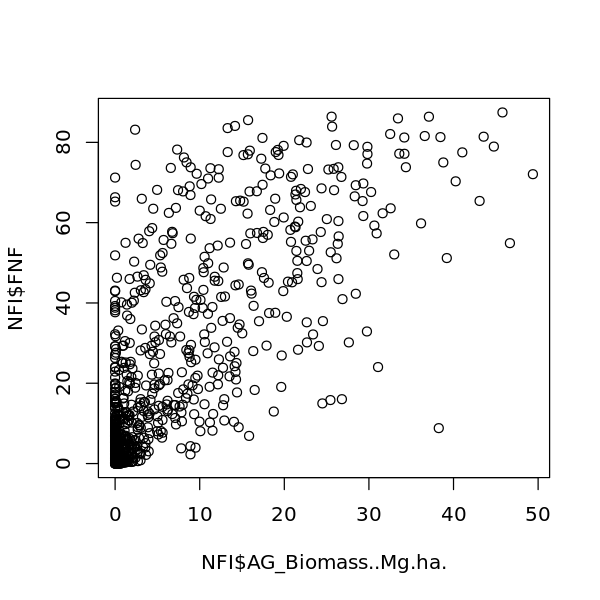


Call:
lm(formula = NFI$AG_Biomass..Mg.ha. ~ NFI$GEDI_L4A)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.511  -2.607  -1.707   1.605  32.089 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.15145    0.30364   3.792 0.000161 ***
NFI$GEDI_L4A  0.97396    0.03176  30.667  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.532 on 781 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5463,	Adjusted R-squared:  0.5457 
F-statistic: 940.5 on 1 and 781 DF,  p-value: < 2.2e-16


Warning message in NFI$AG_Biomass..Mg.ha. - predictions:
“longer object length is not a multiple of shorter object length”


[1] "RMSE: 7.59738951270061"


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


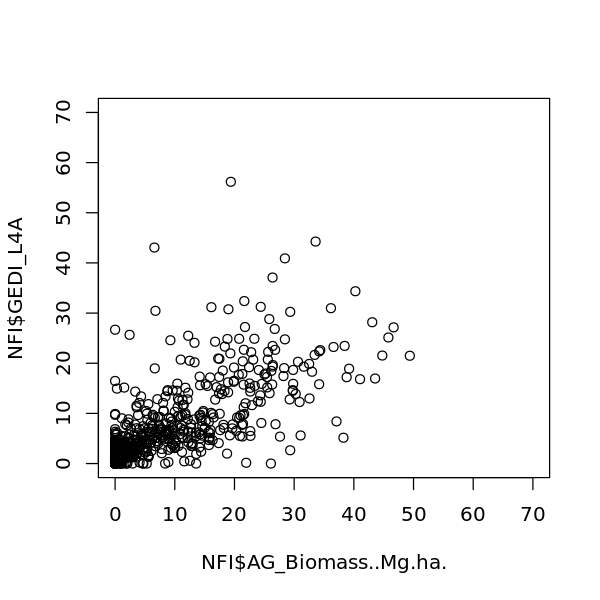

Time used:
    Pre = 0.374, Running = 0.244, Post = 0.051, Total = 0.669 
Fixed effects:
             mean    sd 0.025quant 0.5quant 0.975quant  mode kld
(Intercept) 1.149 0.303      0.555    1.149      1.743 1.149   0
GEDI_L4A    0.974 0.032      0.912    0.974      1.036 0.974   0

Model hyperparameters:
                                         mean    sd 0.025quant 0.5quant
Precision for the Gaussian observations 0.024 0.001      0.021    0.024
                                        0.975quant  mode
Precision for the Gaussian observations      0.026 0.023

Deviance Information Criterion (DIC) ...............: 5170.49
Deviance Information Criterion (DIC, saturated) ....: 789.31
Effective number of parameters .....................: 2.99

Watanabe-Akaike information criterion (WAIC) ...: 5177.90
Effective number of parameters .................: 10.04

Marginal log-Likelihood:  -2605.42 
CPO, PIT is computed 
Posterior summaries for the linear predictor and the fitted values are comput

lm():Mean lm():SE   inla():Mean inla():SD  inla():0.025quant
(Intercept)  1.1514505 0.3036389 1.1489735   0.30305218 0.5545597        
NFI$GEDI_L4A 0.9739636 0.0317589 0.9741287   0.03171776 0.9119167        
             inla():0.5quant inla():0.975quant
(Intercept)  1.1489734       1.743387         
NFI$GEDI_L4A 0.9741287       1.036341

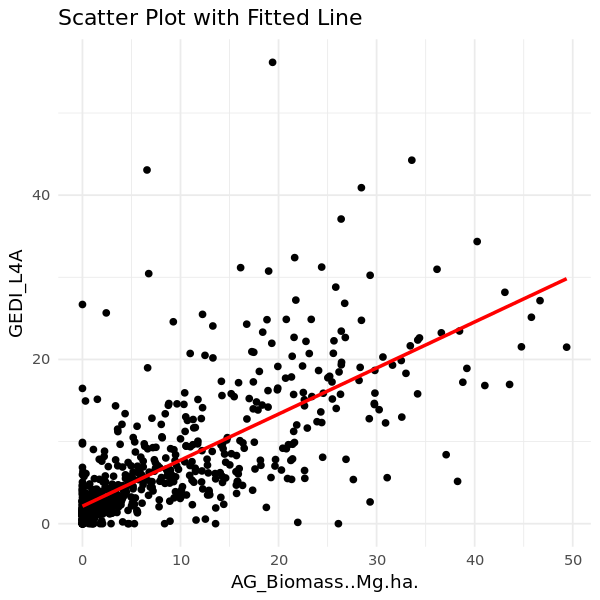

In [11]:
#################################################################
# ##### CHECK WHAT DATA LOOKS LIKE BEFORE MODELING ##############
#################################################################

# options(repr.plot.width=5, repr.plot.height=5)
# NFI = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# plot(NFI$AG_Biomass..Mg.ha.,NFI$FNF)
# plot(NFI$AG_Biomass..Mg.ha.,NFI$GEDI_L4A,xlim=c(0,70),ylim=c(0,70))

# LM_model <- (lm(NFI$AG_Biomass..Mg.ha.~ NFI$GEDI_L4A))
# summary(LM_model)
# predictions <- predict(LM_model)
# residuals <- NFI$AG_Biomass..Mg.ha. - predictions
# rmse <- sqrt(mean(residuals^2))
# print(paste("RMSE:", rmse))

# ggplot(NFI, aes(x = AG_Biomass..Mg.ha., y = GEDI_L4A)) +
#   geom_point() +  # Scatter points
#   geom_smooth(method = "lm", se = FALSE, color = "red") +  # Fit line
#   labs(title = "Scatter Plot with Fitted Line", x = "AG_Biomass..Mg.ha.", y = "GEDI_L4A") + theme_minimal()

# formula = (AG_Biomass..Mg.ha.)~ (GEDI_L4A)
# INLA_model <- inla(formula, data=NFI, family="gaussian",control.compute=list(config = T, dic = T, waic = T, cpo=TRUE)) #option cpo is a leave-one-out cross validation
# summary(INLA_model)

# #### Let's do a quick comparison, just to see how our outputs compare 
# output <- cbind(summary(LM_model)$coef[,1:2],INLA_model$summary.fixed[,1:5]) # Looking great! 
# colnames(output) <- c("lm():Mean","lm():SE","inla():Mean","inla():SD","inla():0.025quant","inla():0.5quant","inla():0.975quant")
# output # Looking great! 

Reading layer `Sudan_country' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Sudan_country.gpkg' 
  using driver `GPKG'
Simple feature collection with 1 feature and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 21.84084 ymin: 8.684103 xmax: 38.58349 ymax: 23.13772
Geodetic CRS:  WGS 84

	Moran I test under randomisation

data:  DATA$AG_Biomass..Mg.ha.  
weights: listw    

Moran I statistic standard deviate = 19.641, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.655948398      -0.001277139       0.001119740 



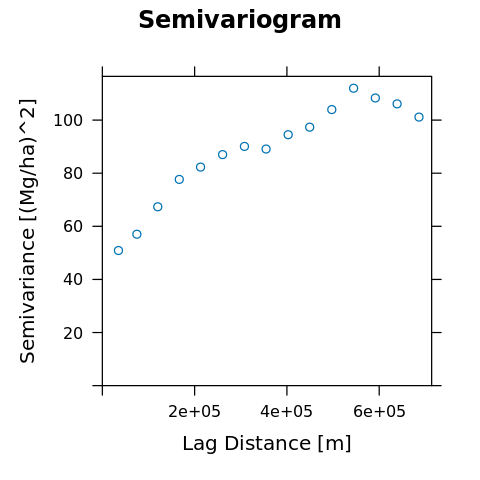

In [9]:
#################################################################################
####### DO MORAN'S I TEST AND SPLIT DATA INTO TESTING AND TRAINING ##############
#################################################################################

# Sudan <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Sudan_country.gpkg")
# Sudan <- Sudan %>% st_transform(crs=6933)
# FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")
# THRESHOLD_FOREST_PROBABILITY = 10

# DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# DATA$gedi.agbd <- (DATA$GEDI_L4A)
# DATA$HANSEN.tc <- (DATA$TC)
# DATA$CCI.agb <- (DATA$CCI)
# DATA$HEIGHT.agb <- (DATA$HEIGHT)
# DATA$FNF.prob <- (DATA$FNF)

# coordinates <- cbind(DATA$X, DATA$Y)
# neighbors <- knn2nb(knearneigh(coordinates, k = 2)) 
# listw <- nb2listw(neighbors)
# moran_result <- moran.test(DATA$AG_Biomass..Mg.ha., listw)
# print(moran_result)

# # A very high standard deviation like 19.641 suggests that the observed value is significantly different from the expected mean (which is usually 0).
# # This p-value is extremely small, indicating strong statistical significance.

# coordinates(DATA) <- ~X + Y
# v <- variogram(AG_Biomass..Mg.ha. ~ 1, DATA)
# plot(v, main = "Semivariogram", xlab = "Lag Distance [m]", ylab = "Semivariance [(Mg/ha)^2]")

# ### We retain 100% of the data, but one can split it by holding-out 10% if required ###########
# dt = sort(sample(nrow(DATA), nrow(DATA)*1))
# DATA <- DATA[dt,]
# write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA.csv",row.names=FALSE) #Save the data
# # DATA_TEST <- DATA[-dt,]
# # write.csv(DATA_TEST,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA_TEST.csv",row.names=FALSE) 
# # plot(DATA_TEST$AG_Biomass..Mg.ha.,DATA_TEST$gedi.agbd) #Save the data
# # plot(DATA_TEST$AG_Biomass..Mg.ha.,DATA_TEST$FNF.prob) #Save the data

Reading layer `ne_10m_admin_0_countries' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Sudan_NE.gpkg' 
  using driver `GPKG'
Simple feature collection with 1 feature and 168 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 21.80945 ymin: 8.681642 xmax: 38.60385 ymax: 22.22696
Geodetic CRS:  WGS 84


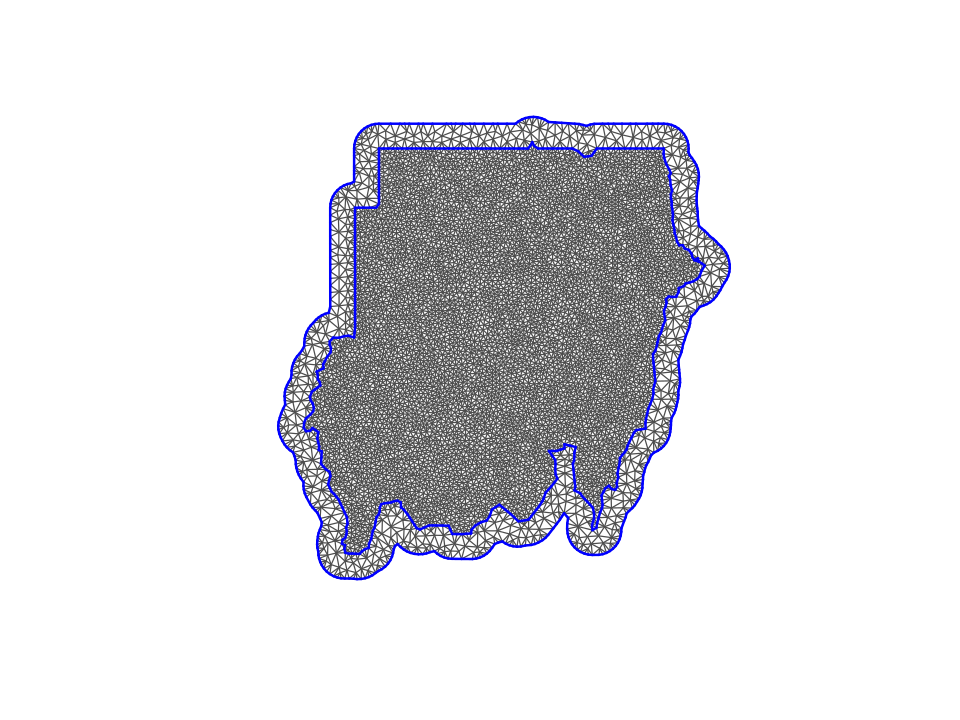

In [13]:
###################################################################
################ BEGIN MODELING - CREATE INLA MESH ################
###################################################################

options(repr.plot.width=8, repr.plot.height=6)
Sudan <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Sudan_NE.gpkg")
Sudan <- Sudan %>% st_transform(crs=6933)

DATA <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA.csv")
DATA <- DATA[DATA$gedi.agbd > 0,]
DATA <- DATA[DATA$AG_Biomass..Mg.ha. > 0,]
factor <- (1/3)
DATA$AG_Biomass..Mg.ha. <- (DATA$AG_Biomass..Mg.ha.)^factor

loc.plot <- data.matrix(as.data.frame(cbind(DATA$X,DATA$Y)))
nfi.agbd <- DATA$AG_Biomass..Mg.ha. 
gedi.agbd <- DATA$gedi.agbd
HANSEN.tc <- DATA$HANSEN.tc
CCI.agb <- DATA$CCI.agb
FNF.prob <- DATA$FNF.prob

max.edge = 20*10^3
Sudan.buffer = st_buffer(Sudan, dist = max.edge*5) # We also make a 5 km buffer around Sudan to prevent boundary effects.
mesh = inla.mesh.2d(boundary = list(as(Sudan, "Spatial"), as(Sudan.buffer, "Spatial")), max.edge = c(max.edge, 3*max.edge), cutoff = 2*max.edge/3, offset = c(max.edge, 5*max.edge)) 
k = mesh$n ### This is the resulting number of vertices
loc.plot <- data.matrix(loc.plot) #In case loc.plot is a df rather than matrix, use "loc.plot <- data.matrix(loc.plot)"
plot(mesh)

n.plot = nrow(loc.plot)
A.plot = inla.spde.make.A(mesh = mesh, loc = loc.plot) # make a new projector matrix with the new mesh and the same plot locations. 

Time used:
    Pre = 0.784, Running = 140, Post = 1.51, Total = 142 
Fixed effects:
           mean    sd 0.025quant 0.5quant 0.975quant  mode kld
intercept 0.838 0.253      0.342    0.838      1.334 0.838   0
L4A       0.032 0.006      0.021    0.032      0.044 0.032   0
FNF       0.012 0.003      0.006    0.012      0.017 0.012   0

Random effects:
  Name	  Model
    alpha.spat SPDE2 model
   beta.spat SPDE2 model
   eta.spat SPDE2 model

Model hyperparameters:
                                            mean       sd 0.025quant 0.5quant
Precision for the Gaussian observations 5.49e+00 3.70e-01   4.79e+00 5.48e+00
Range for alpha.spat                    8.12e+05 3.57e+05   3.66e+05 7.34e+05
Stdev for alpha.spat                    4.67e-01 1.22e-01   2.84e-01 4.48e-01
Range for beta.spat                     2.71e+05 3.54e+05   2.24e+04 1.65e+05
Stdev for beta.spat                     1.30e-02 6.00e-03   5.00e-03 1.20e-02
Range for eta.spat                      4.47e+05 3.51e+05   1.04

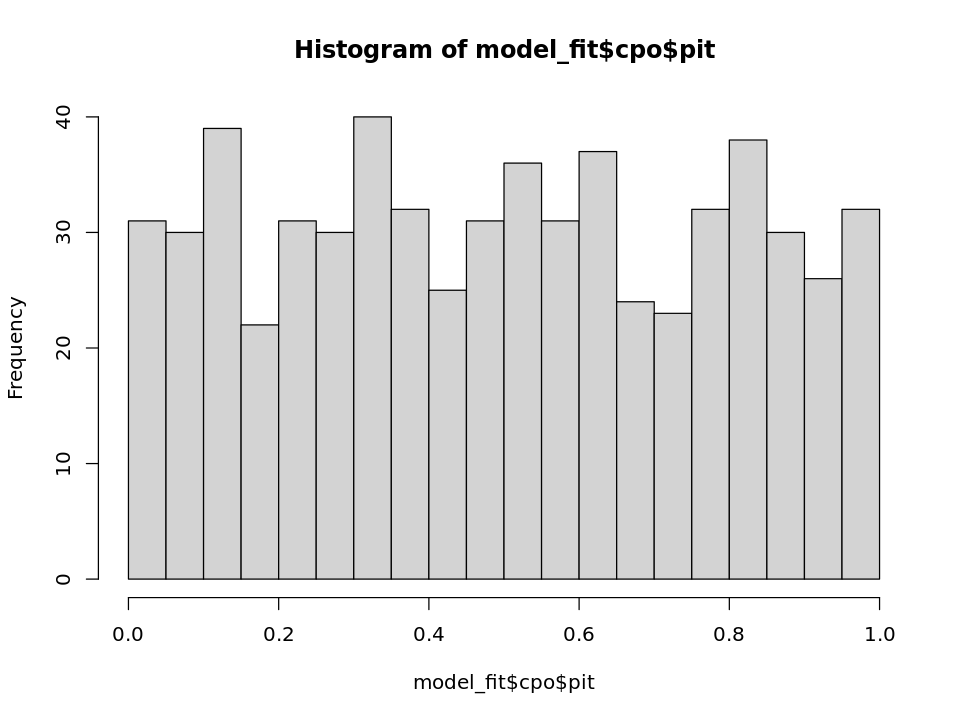

In [32]:
###############################################################
################ SET PRIORS AND RUN MODEL #####################
###############################################################

# Priors for the varying intercept alpha_tilde
spde.alpha = inla.spde2.pcmatern(mesh, 
                                 prior.range = c(30*10^3, 0.01), # This says the probability that the range is LESS than 30 km is 0.01
                                 prior.sigma = c(60, 0.01)) # This says the probability that the SD is GREATER than 60 Mg/ha is 0.01

# Priors for the varying coefficient beta_tilde
spde.beta = inla.spde2.pcmatern(mesh, 
                                prior.range = c(30*10^3, 0.01), # Same interpretations as above here
                                prior.sigma = c(1, 0.5)) # This says the probability that the SD is GREATER than 1 is 0.5


# Priors for the varying coefficient eta_tilde
spde.eta = inla.spde2.pcmatern(mesh, 
                                prior.range = c(30*10^3, 0.01), # Same interpretations as above here
                                prior.sigma = c(1, 0.5)) # This says the probability that the SD is GREATER than 1 is 0.5


### Construct our formula #####
formula = agbd ~
  -1 + # removes the automatic intercept so you can include your named intercept
  intercept + 
  L4A + 
  FNF + 
  f(alpha.spat, model = spde.alpha) + 
  f(beta.spat, model = spde.beta) + 
  f(eta.spat, model = spde.eta)

## Arrange our data so we can supply it to INLA to input in the formula above #####
stack = inla.stack(data = list(agbd = nfi.agbd),
                   A = list(1, # tell INLA we expect an intercept, and the projection matrix is just "1"
                            1, # tell INLA we expect a GEDI value, and the projection matrix for its parameter is just "1"
                            1, # tell INLA we expect a FNF value, and the projection matrix for its parameter is just "1"
                            A.plot, # tell INLA we have a mesh projected onto the plot locations for alpha-tilde 
                            Diagonal(x = gedi.agbd)%*%A.plot, # tell INLA to multiply our mesh with GEDI values for Beta-tilde
                            Diagonal(x = FNF.prob)%*%A.plot), # tell INLA to multiply our mesh with FNF values for eta-tilde
                   effects = list(
                     intercept = rep(1, n.plot), # The intercept just given an index equal to 1
                     L4A = gedi.agbd, # Supply INLA with the GEDI values
                     FNF = FNF.prob, # Supply INLA with the FNF values
                     alpha.spat = 1:k, # The random effects just need to given unique indices at each mesh node.
                     beta.spat = 1:k, # The random effects just need to given unique indices at each mesh node.
                     eta.spat = 1:k # The random effects just need to given unique indices at each mesh node.
                   ))

model_fit = inla(formula = formula, # Provide the formula
                 family = 'gaussian', # We assume our data follows a Gaussian generalized linear model (GLM)
                 data = inla.stack.data(stack), # These line and the one below are simply how we feed INLA the stack.
                 control.predictor = list(A = inla.stack.A(stack)),
                 control.compute = list(config = T, dic = T, waic = T, cpo = T),
                 control.inla = list(int.strategy = "eb"), # EB just fixes the hyperparameters at their maximum posterior (like maximum likelihood, but accounting for priors) values. The other methods manually integrate across the range of possible values.
                 verbose = TRUE)

summary(model_fit)
save(model_fit, file = "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
hist(model_fit$cpo$pit, breaks = 20) 

PITs <- model_fit$cpo$pit
length(PITs[PITs >= 0.025 & PITs <= 0.975])/length(PITs)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


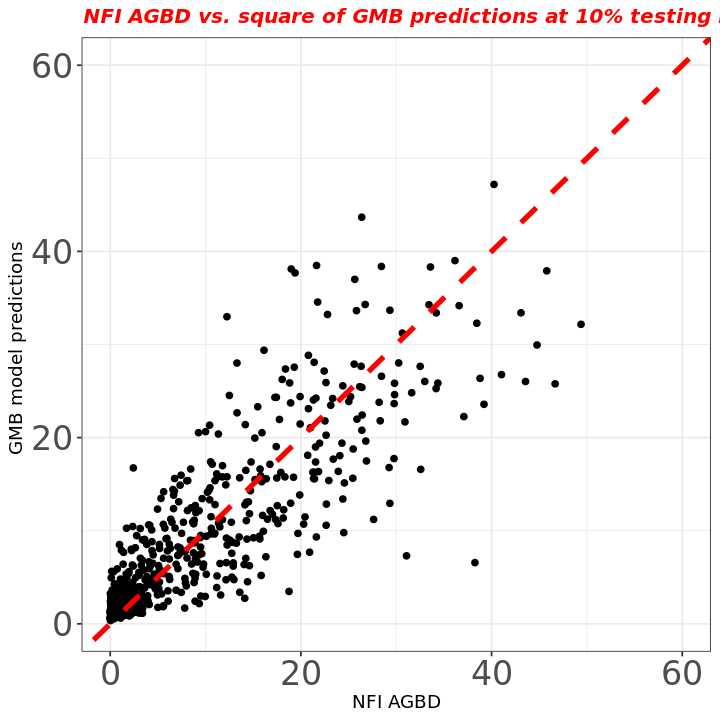

In [13]:
###############################################################
######## SCATTER PLOT OF PREDICTIONS VS. NFI-ESTIMATES ########
###############################################################

samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    gedi.agbd*L4A +
    FNF.prob*FNF +
    A.plot%*%alpha.spat[1:k] +   
    Diagonal(x = gedi.agbd)%*%A.plot%*%beta.spat[1:k] + 
    Diagonal(x = FNF.prob)%*%A.plot%*%eta.spat[1:k]) +
    rnorm(nrow(A.plot), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)
options(repr.plot.width=5, repr.plot.height=5)

OUTPUT <- do.call(rbind, Map(data.frame, PRED=pred.mu, NFI=nfi.agbd^(1/factor), PRED.SD=pred.sd, RES=nfi.agbd^(1/factor)-pred.mu))
options(repr.plot.width=6, repr.plot.height=6)
ggplot(data = OUTPUT, aes(x = NFI,y = PRED))+ geom_point()  + geom_abline(size=0.5,linetype=2,col="red",lwd=1.5) + theme_bw() + xlim(0,60) + ylim(0,60) + xlab("NFI AGBD") + ylab("GMB model predictions ") + ggtitle("NFI AGBD vs. square of GMB predictions at 10% testing locations") + theme(plot.title = element_text(color="red", size=12, face="bold.italic"),axis.text=element_text(size=20))

In [14]:
######################## HEURISTICS: R2 AND RMSE ###################
R2_backtrans = 1 - (sum((pred.mu - nfi.agbd^(1/factor))^2,na.rm=TRUE)/sum((nfi.agbd^(1/factor) - mean(nfi.agbd^(1/factor),na.rm=TRUE))^2,na.rm=TRUE))
R2_backtrans
RMSE = sqrt(mean((pred.mu - nfi.agbd^(1/factor))^2,na.rm=TRUE))
RMSE
BIAS = mean(pred.mu,na.rm=TRUE) - mean(nfi.agbd^(1/factor),na.rm=TRUE)
BIAS # Mg/ha

############## RATE OF OVERLAP OF CREDIBILITY INTERVALS ###################
Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025), na.rm=TRUE)
Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975), na.rm=TRUE)
sum((nfi.agbd^(1/factor) >= Q25) & (nfi.agbd^(1/factor) <= Q975), na.rm=TRUE)/length(nfi.agbd^(1/factor))
 
Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025),  na.rm = TRUE)
Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975),  na.rm = TRUE)
AGBD <- nfi.agbd^(1/factor)
Q25 <- Q25[AGBD > 10]
Q975 <- Q975[AGBD > 10]
AGBD <- AGBD[AGBD > 10]
sum((AGBD >= Q25) & (AGBD <= Q975), na.rm=TRUE)/length(AGBD)

Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025),  na.rm = TRUE)
Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975),  na.rm = TRUE)
AGBD <- nfi.agbd^(1/factor)
Q25 <- Q25[AGBD <= 10]
Q975 <- Q975[AGBD <= 10]
AGBD <- AGBD[AGBD <= 10]
sum((AGBD >= Q25) & (AGBD <= Q975), na.rm=TRUE)/length(AGBD)

[1] 0.7213486

[1] 5.333263

[1] 0.06304557

[1] 0.9565217

[1] 0.9389671

[1] 0.9633252

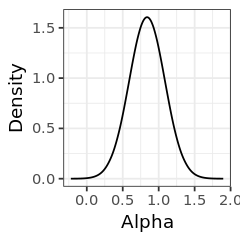

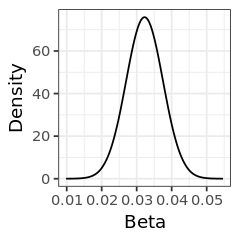

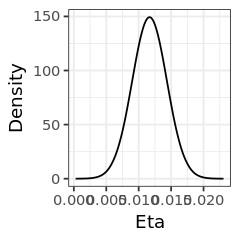

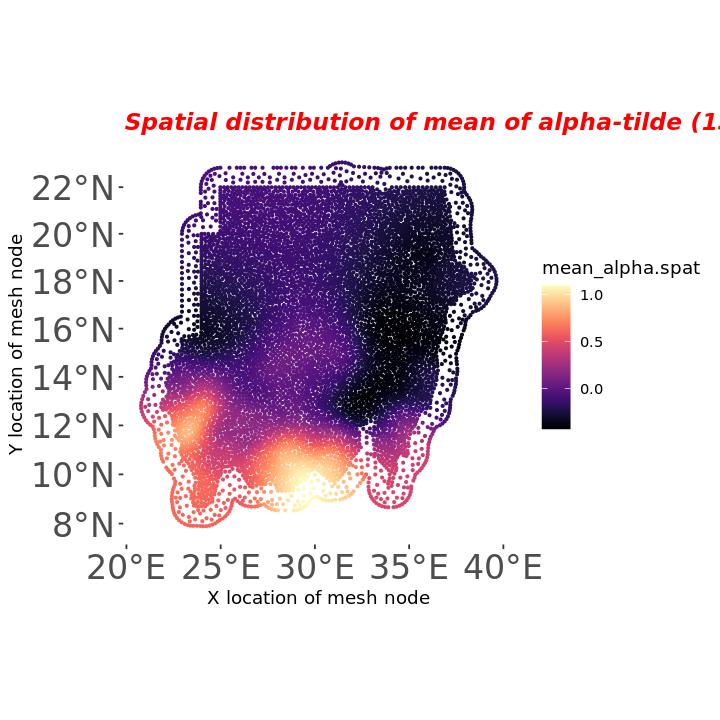

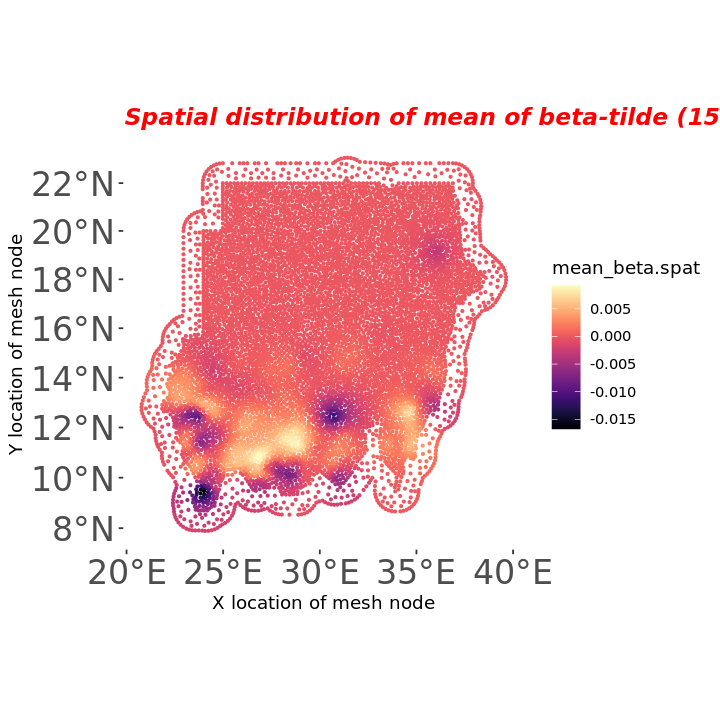

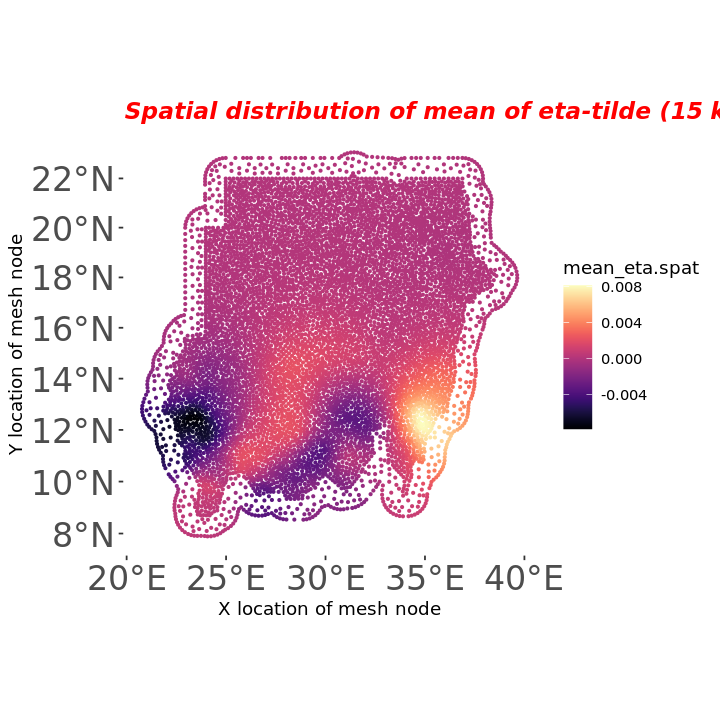

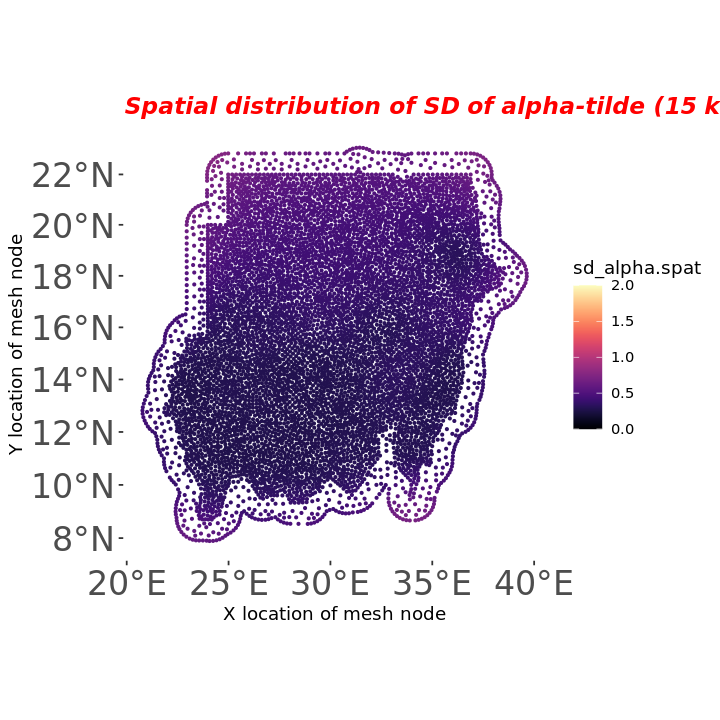

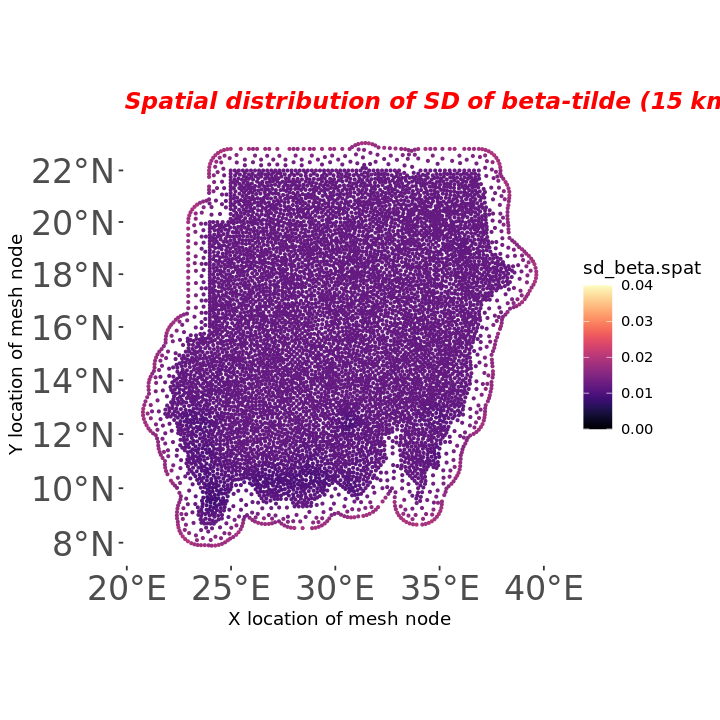

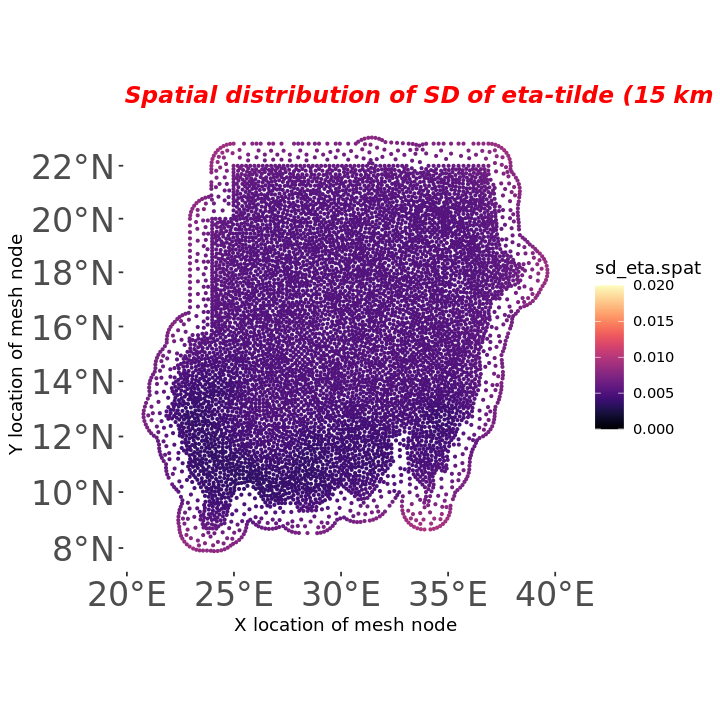

In [18]:
#############################################################################################
##################### LETS VISUALIZE THE MODEL PARAMETERS ###################################
#############################################################################################

options(repr.plot.width=2, repr.plot.height=2)
load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")

# When inla() is executed, we obtain an object of class "inla" that contains the information of the fitted model 
# including summaries and posterior marginal densities of the fixed effects, 
# the random effects, and the hyperparameters (and many more things, but we explore only these for now). 

# The fixed effects are straighforward to understand. Below, we see the posterior elements of the intercept alpha, and parameters beta and eta. 
alpha <- model_fit$marginals.fixed[[1]]
beta <- model_fit$marginals.fixed[[2]]
eta <- model_fit$marginals.fixed[[3]]
ggplot(data.frame(inla.smarginal(alpha)), aes(x, y)) + geom_line() + theme_bw() + xlab("Alpha") + ylab("Density")
ggplot(data.frame(inla.smarginal(beta)), aes(x, y)) + geom_line() + theme_bw() + xlab("Beta") + ylab("Density")
ggplot(data.frame(inla.smarginal(eta)), aes(x, y)) + geom_line() + theme_bw() + xlab("Eta") + ylab("Density")

# The random effects, in our case, are also easy to understand from the model outputs. The posterior distributions of the range and SD of alpha.spat, 
# beta.spat and eta.spat show us how these random effects vary across Mexico.

options(repr.plot.width=6, repr.plot.height=6)

mean_alpha.spat <- model_fit$summary.random[[1]]$mean # mean values of alpha.spat at each mesh vertex
sd_alpha.spat <- model_fit$summary.random[[1]]$sd # standard deviation of alpha.spat at each mesh node 

mean_beta.spat <- model_fit$summary.random[[2]]$mean # mean values of alpha.spat at each mesh vertex
sd_beta.spat <- model_fit$summary.random[[2]]$sd # standard deviation of alpha.spat at each mesh node 

mean_eta.spat <- model_fit$summary.random[[3]]$mean # mean values of alpha.spat at each mesh vertex
sd_eta.spat <- model_fit$summary.random[[3]]$sd # standard deviation of alpha.spat at each mesh node 

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = mean_alpha.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma") + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of mean of alpha-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = mean_beta.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma") + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of mean of beta-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = mean_eta.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
          scale_color_viridis(option="magma") + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of mean of eta-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = sd_alpha.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma",limits=c(0,2)) + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of SD of alpha-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = sd_beta.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma",limits=c(0,0.04)) + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of SD of beta-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = sd_eta.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma",limits=c(0,0.02)) + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of SD of eta-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
options(repr.plot.width=4, repr.plot.height=4)

# DIC, WAIC and the CPO and PIT are standard Bayesian model diagnostics, which tell us how our model is performing. 

Reading layer `Sudan_Stats' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 21.81316 ymin: 8.641127 xmax: 38.58004 ymax: 23.14689
Geodetic CRS:  WGS 84
[1] "Processing State:  Southern Kordufan"
  |======================================================================| 100%


Cannot preload entire working area of 136706256 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted AGBD: 17.37"
[1] "Predicted SD of AGBD: 4.5"
[1] "------------------------------------------------------"


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


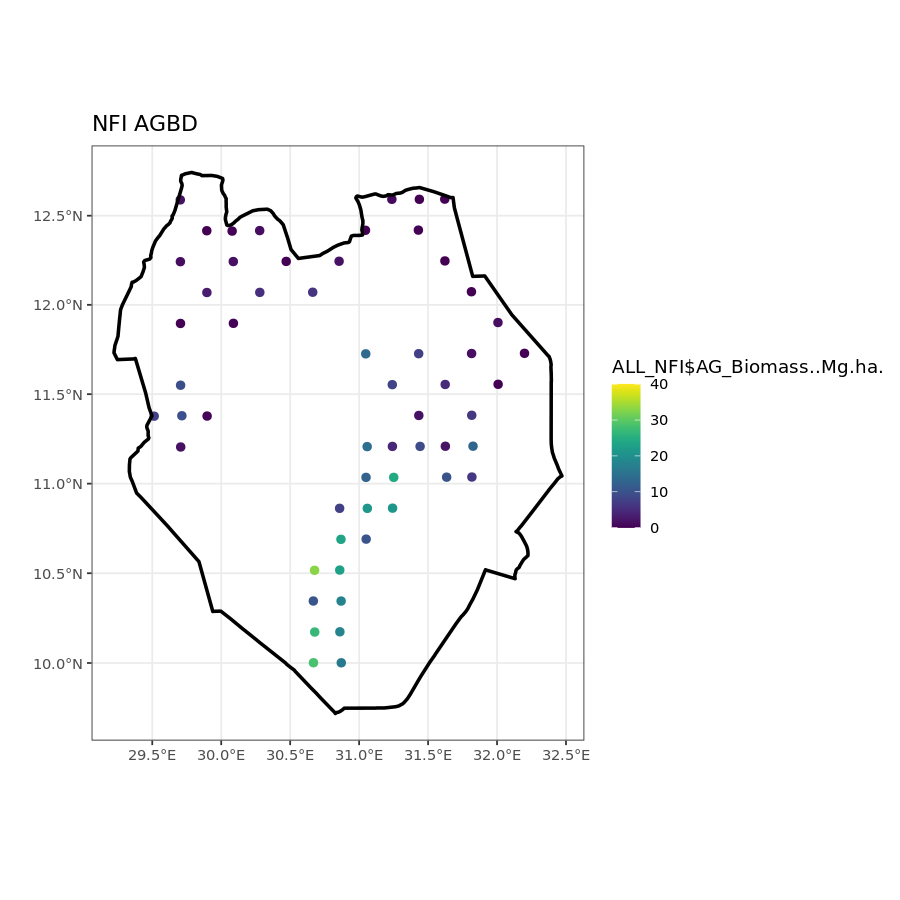

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


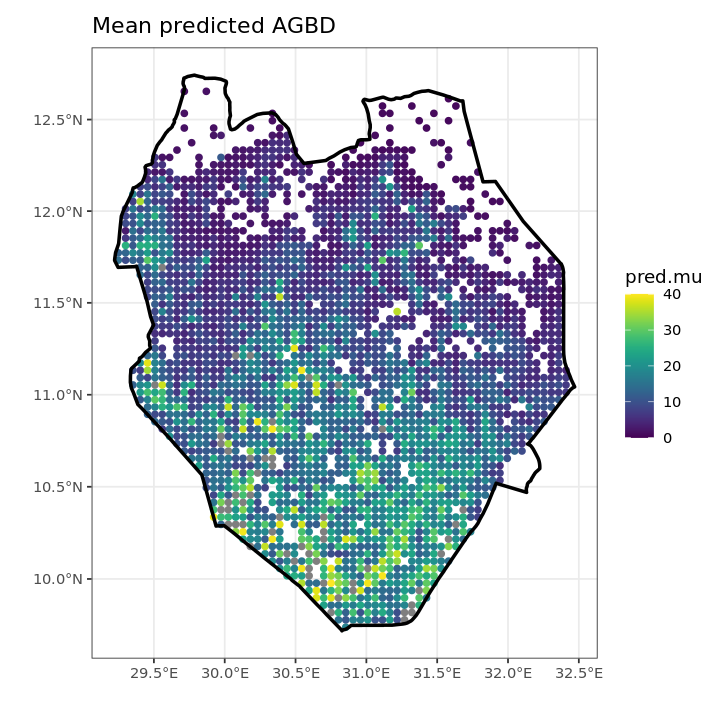

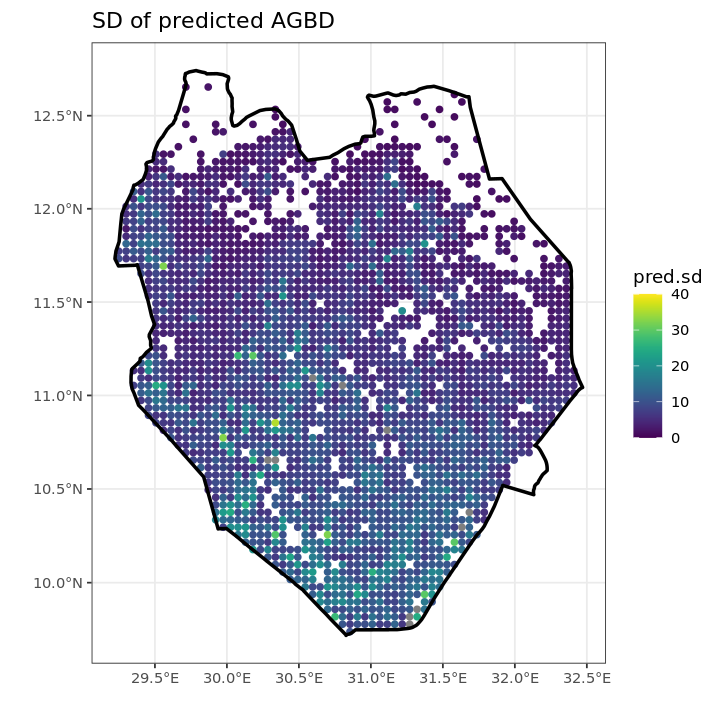

In [26]:
###############################################################################
################ MAKING FIGURE FOR PREDICTIONS IN ONE STATE ##################
###############################################################################

THRESHOLD_FOREST_PROBABILITY = 10

States <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats.shp") %>% st_transform(crs=6933)
States["AGBD"] <- 0
States["AGBD_SE"] <- 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")

State_name <- "Southern Kordufan"
State <- States[States$State == State_name,]
print(paste("Processing State: ", State_name))

grid_to_predict = st_make_grid(State, cellsize = c(5000,5000), what = "centers") %>% st_as_sf() %>% st_filter(State)
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,250), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,250), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = NA
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

# Model mean AGBD expectations and SD of the strata
Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)

print(paste0("Mean predicted AGBD: ", Strata_mean))
print(paste0("Predicted SD of AGBD: ", Strata_SD))
print("------------------------------------------------------")
States[States$State == State_name,]$AGBD <- Strata_mean
States[States$State == State_name,]$AGBD_SE <- Strata_SD

options(repr.plot.width=8, repr.plot.height=8)

ALL_NFI = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
ALL_NFI <- st_as_sf(x = ALL_NFI, coords = c("X", "Y"),crs = 6933) %>% st_filter(State)
COORDS <- as.data.frame(ALL_NFI %>% st_coordinates())
ALL_NFI <- ALL_NFI %>% st_drop_geometry()
ALL_NFI['X'] <- COORDS$X
ALL_NFI['Y'] <- COORDS$Y

options(repr.plot.width=7.5, repr.plot.height=7.5)
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = ALL_NFI$X, y = ALL_NFI$Y, col = ALL_NFI$AG_Biomass..Mg.ha.),size=2) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 40)) + xlab("") + ylab("") + ggtitle("NFI AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),axis.text = element_text(size = 20)) +
           theme_bw() + geom_sf(data = State,col="black",fill=NA,lwd=1)# add our fake deforestation sites

options(repr.plot.width=6, repr.plot.height=6)
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=1.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 40)) + xlab("") + ylab("") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=20, face="bold.italic"),axis.text.x = element_text(size = 20)) +
           theme_bw() + geom_sf(data = State,col="black",fill=NA,lwd=1)# add our fake deforestation sites


ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=1.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 40)) + xlab("") + ylab("") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),axis.text = element_text(size = 20)) + 
           theme_bw() + geom_sf(data = State,col="black",fill=NA,lwd=1)# add our fake deforestation sites


Reading layer `Sudan_Stats' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 21.81316 ymin: 8.641127 xmax: 38.58004 ymax: 23.14689
Geodetic CRS:  WGS 84
[1] "Processing State:  Khartoum State"
  |======================================================================| 100%


Cannot preload entire working area of 3078172170 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted AGBD: 3.95"
[1] "Predicted SD of AGBD: 0.53"
[1] "------------------------------------------------------"


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


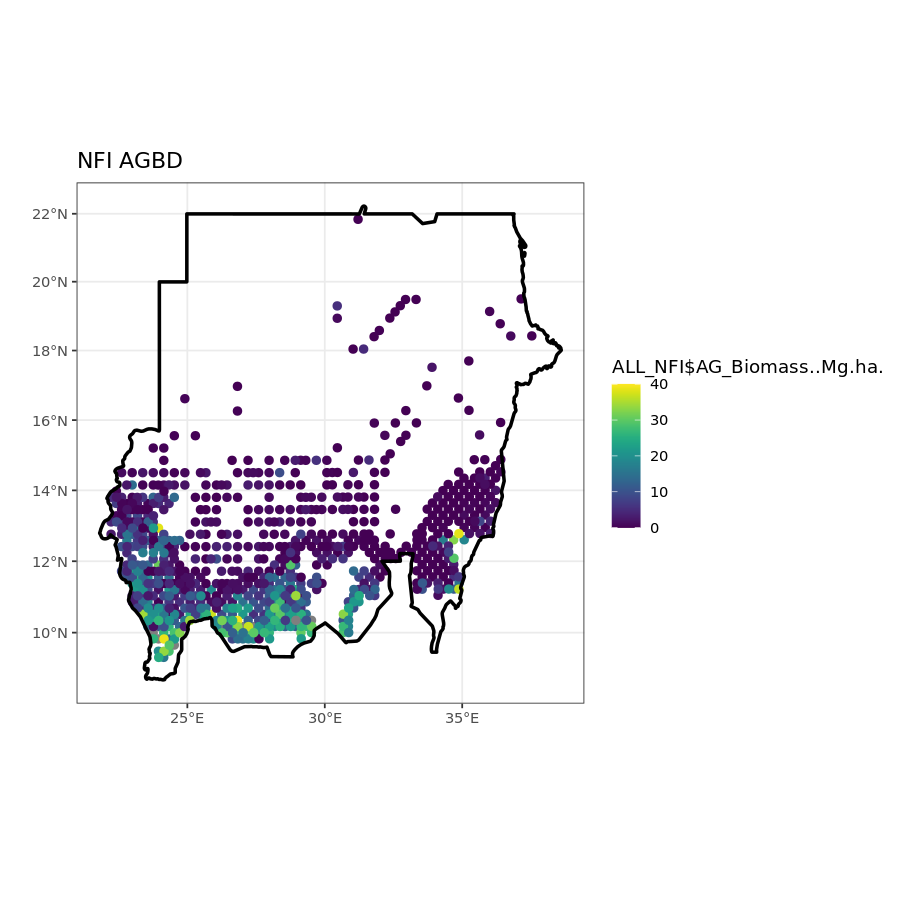

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


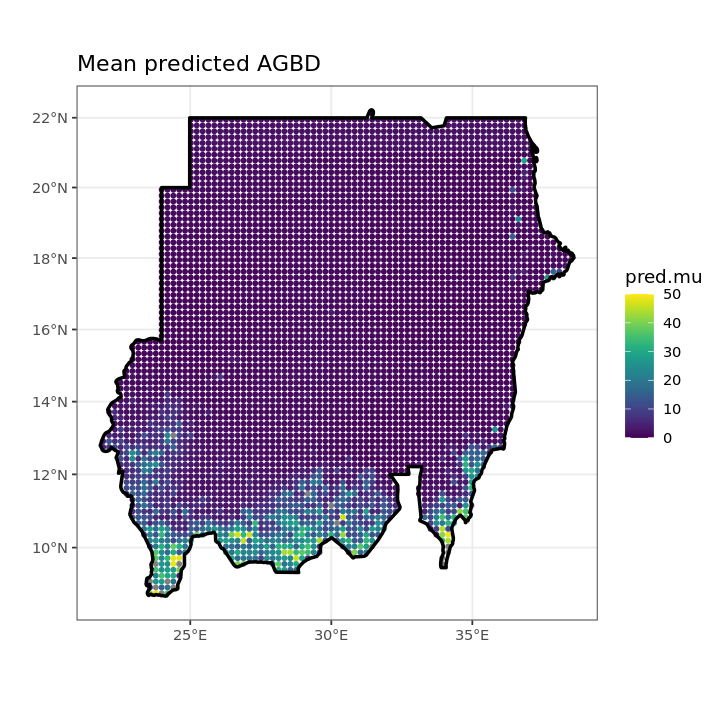

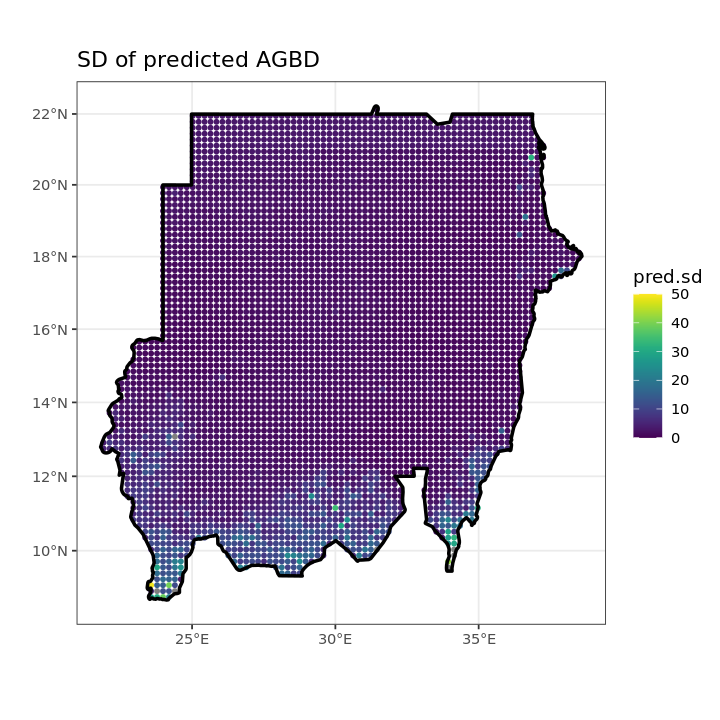

In [28]:
###############################################################################
################ MAKING FIGURE FOR PREDICTIONS IN COUNTRY ##################
###############################################################################

THRESHOLD_FOREST_PROBABILITY = 0

States <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats.shp") %>% st_transform(crs=6933)
States["AGBD"] <- 0
States["AGBD_SE"] <- 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")

State <- Sudan
print(paste("Processing State: ", State_name))

grid_to_predict = st_make_grid(State, cellsize = c(20000,20000), what = "centers") %>% st_as_sf() %>% st_filter(State)
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,250), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,250), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = NA
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
# grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
# grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

# FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
# GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

pred.mu[is.na(pred.mu)] = 2
pred.sd[is.na(pred.sd)] = 3

# Model mean AGBD expectations and SD of the strata
Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)

print(paste0("Mean predicted AGBD: ", Strata_mean))
print(paste0("Predicted SD of AGBD: ", Strata_SD))
print("------------------------------------------------------")
States[States$State == State_name,]$AGBD <- Strata_mean
States[States$State == State_name,]$AGBD_SE <- Strata_SD

options(repr.plot.width=8, repr.plot.height=8)

ALL_NFI = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
ALL_NFI <- st_as_sf(x = ALL_NFI, coords = c("X", "Y"),crs = 6933) %>% st_filter(State)
COORDS <- as.data.frame(ALL_NFI %>% st_coordinates())
ALL_NFI <- ALL_NFI %>% st_drop_geometry()
ALL_NFI['X'] <- COORDS$X
ALL_NFI['Y'] <- COORDS$Y

options(repr.plot.width=7.5, repr.plot.height=7.5)
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = ALL_NFI$X, y = ALL_NFI$Y, col = ALL_NFI$AG_Biomass..Mg.ha.),size=2) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 40)) + xlab("") + ylab("") + ggtitle("NFI AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),axis.text = element_text(size = 20)) +
           theme_bw() + geom_sf(data = State,col="black",fill=NA,lwd=1)# add our fake deforestation sites

options(repr.plot.width=6, repr.plot.height=6)
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=1) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("") + ylab("") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=20, face="bold.italic"),axis.text.x = element_text(size = 20)) +
           theme_bw() + geom_sf(data = State,col="black",fill=NA,lwd=1)# add our fake deforestation sites


ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=1) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("") + ylab("") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),axis.text = element_text(size = 20)) + 
           theme_bw() + geom_sf(data = State,col="black",fill=NA,lwd=1)# add our fake deforestation sites


In [27]:
###############################################################################
################ RUNNING PREDICTIONS AT STATE LEVEL FOR AGBD ##################
###############################################################################

THRESHOLD_FOREST_PROBABILITY = 10

States <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats.shp") %>% st_transform(crs=6933)
States["AGBD"] <- 0
States["AGBD_SE"] <- 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")

for (State_name in States$State) {
    State <- States[States$State == State_name,]
    print(paste("Processing State: ", State_name))
    
    grid_to_predict = st_make_grid(State, cellsize = c(5000,5000), what = "centers") %>% st_as_sf() %>% st_filter(State)
    grid = as.data.frame(grid_to_predict %>% st_coordinates())

    GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,250), 'mean')
    grid$GEDI.pred <- GEDI.pred

    FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,250), 'mean')
    FNF.array <- FNF.pred
    FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = NA
    FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
    grid$FNF.array = FNF.array
    
    grid_original <- grid
    grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
    grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
    loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))
    
    FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
    GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]
    
    samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
    A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 
    
    # Our model function
    pred_fun = function(...){
      drop(intercept + 
        GEDI.pred*L4A +
        FNF.pred*FNF +
        A.pred%*%alpha.spat[1:k] +   
        Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
        Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
        rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
    }
    
    # Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
    pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
    pred.samples[pred.samples < 0] = 0
    
    # Model mean AGBD expectations and SD's at the grid locations
    pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
    pred.sd = apply(pred.samples^(1/factor), 1, sd)
    
    # Model mean AGBD expectations and SD of the strata
    Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
    Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)
    
    print(paste0("Mean predicted AGBD: ", Strata_mean))
    print(paste0("Predicted SD of AGBD: ", Strata_SD))
    print("------------------------------------------------------")
    States[States$State == State_name,]$AGBD <- Strata_mean
    States[States$State == State_name,]$AGBD_SE <- Strata_SD
    
    ggplot() + coord_sf(crs = 6933) + 
               geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
               scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))
    
    ggplot() + coord_sf(crs = 6933) + 
               geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
               scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))
}

st_write(States, "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats_AGBD_FNF10percent.gpkg")

Reading layer `Sudan_Stats' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 21.81316 ymin: 8.641127 xmax: 38.58004 ymax: 23.14689
Geodetic CRS:  WGS 84
[1] "Processing State:  Blue Nile"
  |======================================================================| 100%


Cannot preload entire working area of 82773237 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted AGBD: 21.44"
[1] "Predicted SD of AGBD: 6.15"
[1] "------------------------------------------------------"
[1] "Processing State:  El Gadarif"
  |======================================================================| 100%


Cannot preload entire working area of 125143545 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted AGBD: 2.78"
[1] "Predicted SD of AGBD: 0.59"
[1] "------------------------------------------------------"
[1] "Processing State:  Gezira State"
  |======================================================================| 100%


Cannot preload entire working area of 47729682 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted AGBD: 1.07"
[1] "Predicted SD of AGBD: 0.64"
[1] "------------------------------------------------------"
[1] "Processing State:  Kassala"
  |======================================================================| 100%


Cannot preload entire working area of 112219304 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted AGBD: 1.37"
[1] "Predicted SD of AGBD: 0.69"
[1] "------------------------------------------------------"
[1] "Processing State:  Khartoum State"
  |======================================================================| 100%


Cannot preload entire working area of 51091250 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


  |======================================================================| 100%


Cannot preload entire working area of 1329484644 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


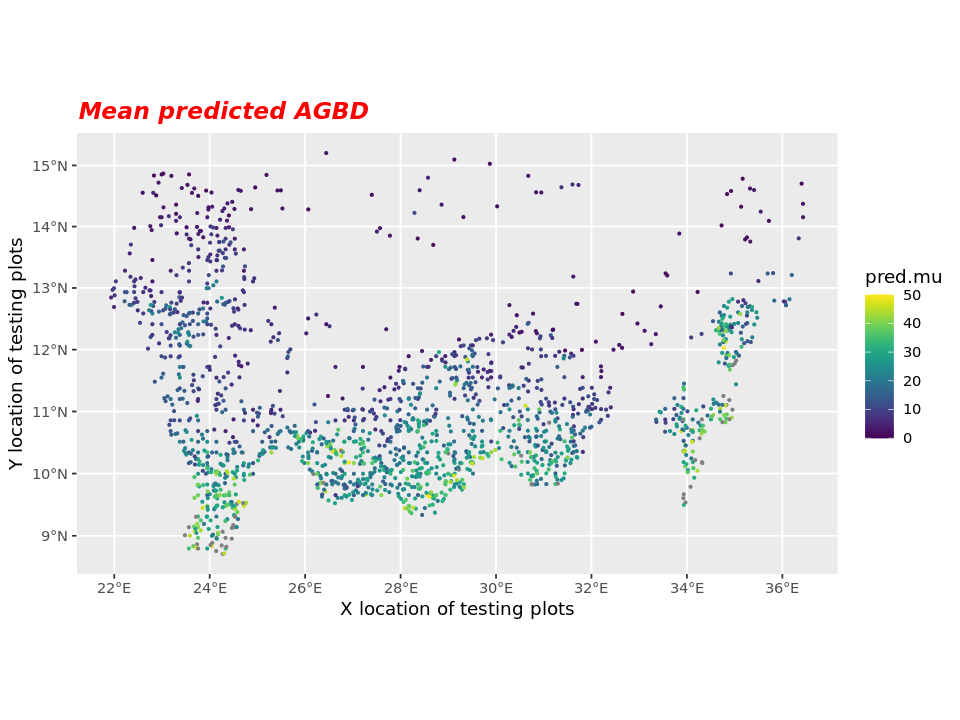

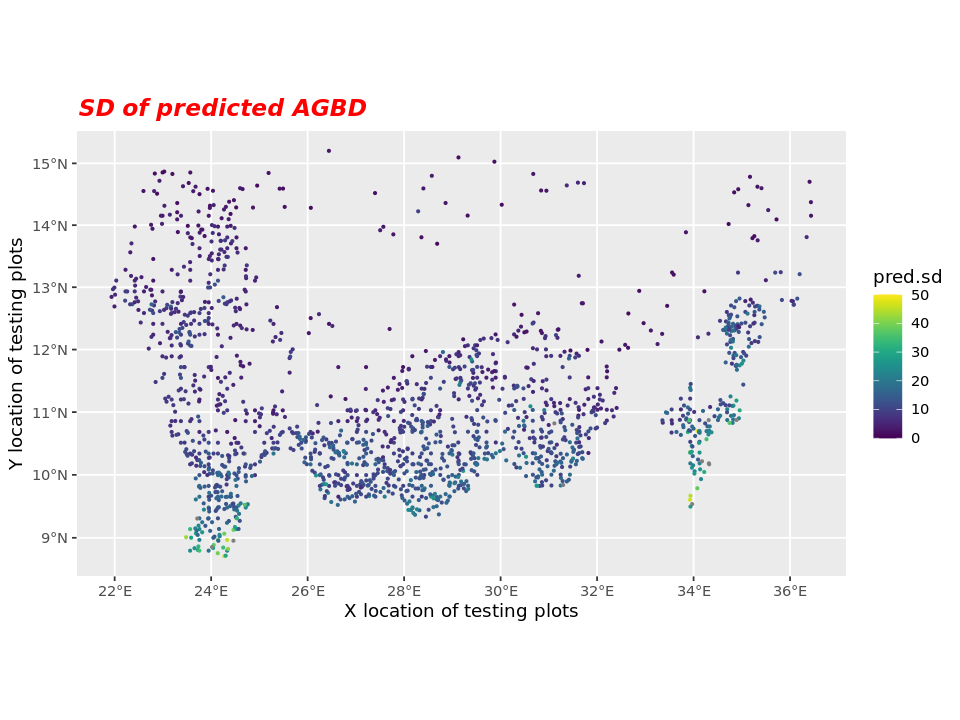

In [3]:
###############################################################
####### PREDICTIONS AT SITES OF DEGRADATION ###################
###############################################################
THRESHOLD_FOREST_PROBABILITY = 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")

# DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Degradation_samples.csv")
DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Stable_forest_sudan_04012025.csv")
grid_to_predict <- st_as_sf(DEG, coords = c("location_x", "location_y"), crs = 4326) %>% st_transform("epsg:6933")
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,21), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,21), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = 1 #NA (we want to prepare ALL degrdation sites, irrespective of FNF)
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
DEG <- DEG[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 1000, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

DEG['AGBD'] <- pred.mu
DEG['AGBD_SE'] <- pred.sd
# write.csv(DEG,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Stable_forest_sudan_04012025_AGBD.csv",row.names=FALSE) #Save the data

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

  |======================================================================| 100%


Cannot preload entire working area of 3118451752 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`).”


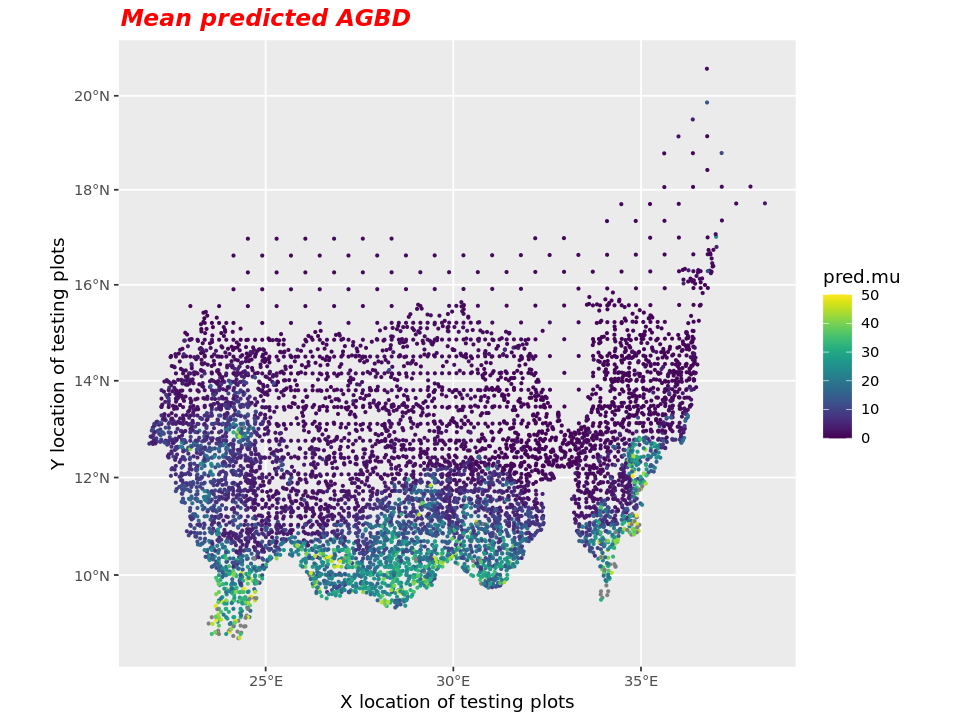

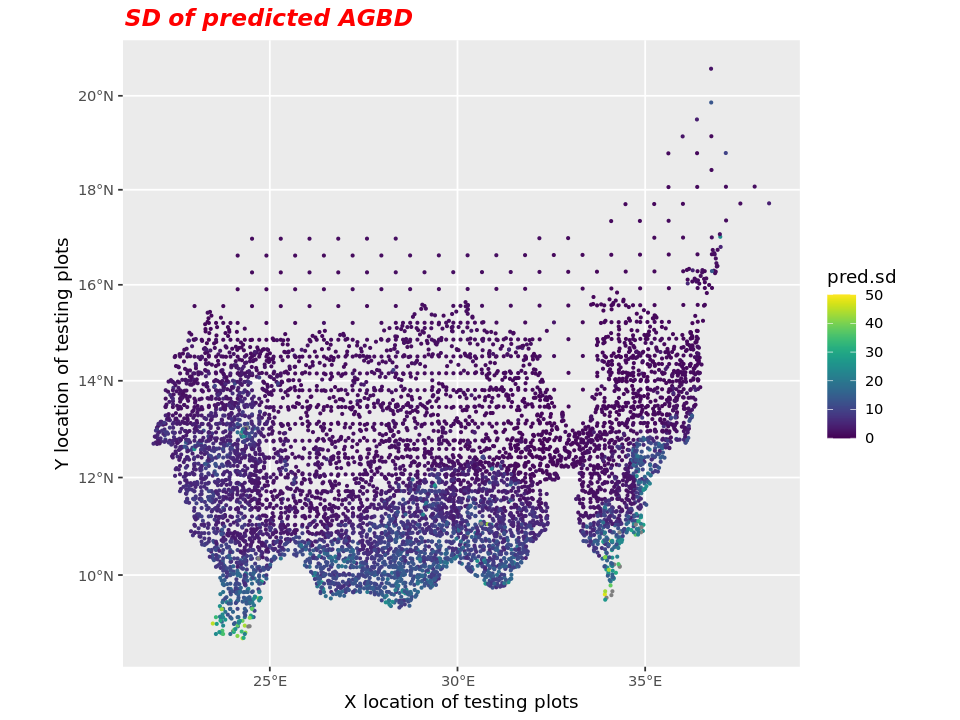

In [14]:
######################################################################
####### PREDICTIONS AT SITES OF NFI hypo and intense REDONE ##########
######################################################################
THRESHOLD_FOREST_PROBABILITY = 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")

# DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Degradation_samples.csv")
# DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Stable_forest_sudan_04012025.csv")
DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/NFI_grid_sudan_CE_assessment.csv")
grid_to_predict <- st_as_sf(DEG, coords = c("location_x", "location_y"), crs = 4326) %>% st_transform("epsg:6933")
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,21), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,21), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = 1 #NA (we want to prepare ALL degrdation sites, irrespective of FNF)
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
DEG <- DEG[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 1000, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

DEG['AGBD'] <- pred.mu
DEG['AGBD_SE'] <- pred.sd
write.csv(DEG,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/NFI_grid_sudan_CE_assessment_AGBD.csv",row.names=FALSE) #Save the data

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

In [ ]:
######################################################################
####### PREDICTIONS AT SITES OF NFI hypo and intense REDONE per state ##########
######################################################################
THRESHOLD_FOREST_PROBABILITY = 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")

# DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Degradation_samples.csv")
# DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Stable_forest_sudan_04012025.csv")
DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/NFI_grid_sudan_CE_assessment.csv")
grid_to_predict <- st_as_sf(DEG, coords = c("location_x", "location_y"), crs = 4326) %>% st_transform("epsg:6933")
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,21), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,21), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = 1 #NA (we want to prepare ALL degrdation sites, irrespective of FNF)
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
DEG <- DEG[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 1000, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

DEG['AGBD'] <- pred.mu
DEG['AGBD_SE'] <- pred.sd
write.csv(DEG,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/NFI_grid_sudan_CE_assessment_AGBD.csv",row.names=FALSE) #Save the data

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

In [16]:
colnames(DEG)

[1] "id"            "location_x"    "location_y"    "FNF_Ch"       
[5] "sample_design" "AGBD"          "AGBD_SE"

Reading layer `ne_10m_admin_0_countries' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Sudan_NE.gpkg' 
  using driver `GPKG'
Simple feature collection with 1 feature and 168 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 21.80945 ymin: 8.681642 xmax: 38.60385 ymax: 22.22696
Geodetic CRS:  WGS 84


Time used:
    Pre = 0.773, Running = 111, Post = 1.09, Total = 113 
Fixed effects:
           mean    sd 0.025quant 0.5quant 0.975quant  mode kld
intercept 0.882 0.277      0.339    0.882      1.425 0.882   0
L4A       0.036 0.006      0.025    0.036      0.047 0.036   0
FNF       0.014 0.021     -0.027    0.014      0.056 0.014   0

Random effects:
  Name	  Model
    alpha.spat SPDE2 model
   beta.spat SPDE2 model
   eta.spat SPDE2 model

Model hyperparameters:
                                            mean       sd 0.025quant 0.5quant
Precision for the Gaussian observations 4.44e+00 2.95e-01   3.88e+00 4.43e+00
Range for alpha.spat                    7.93e+05 3.48e+05   3.54e+05 7.18e+05
Stdev for alpha.spat                    5.09e-01 1.29e-01   3.12e-01 4.91e-01
Range for beta.spat                     2.78e+05 3.81e+05   3.49e+04 1.67e+05
Stdev for beta.spat                     1.30e-02 5.00e-03   6.00e-03 1.20e-02
Range for eta.spat                      7.44e+06 1.10e+07   1.23

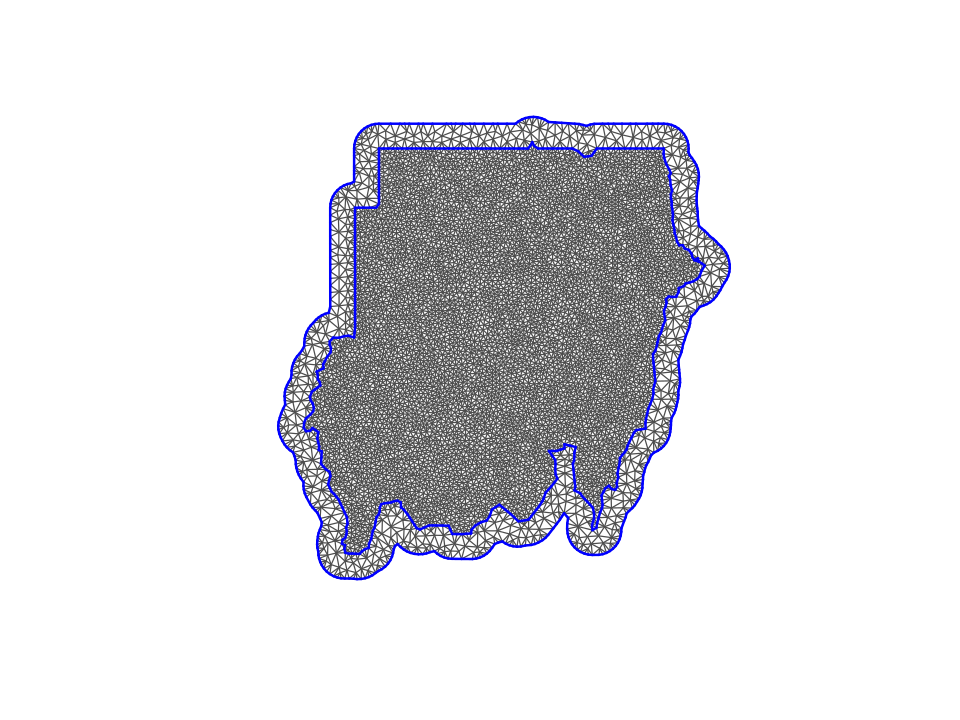

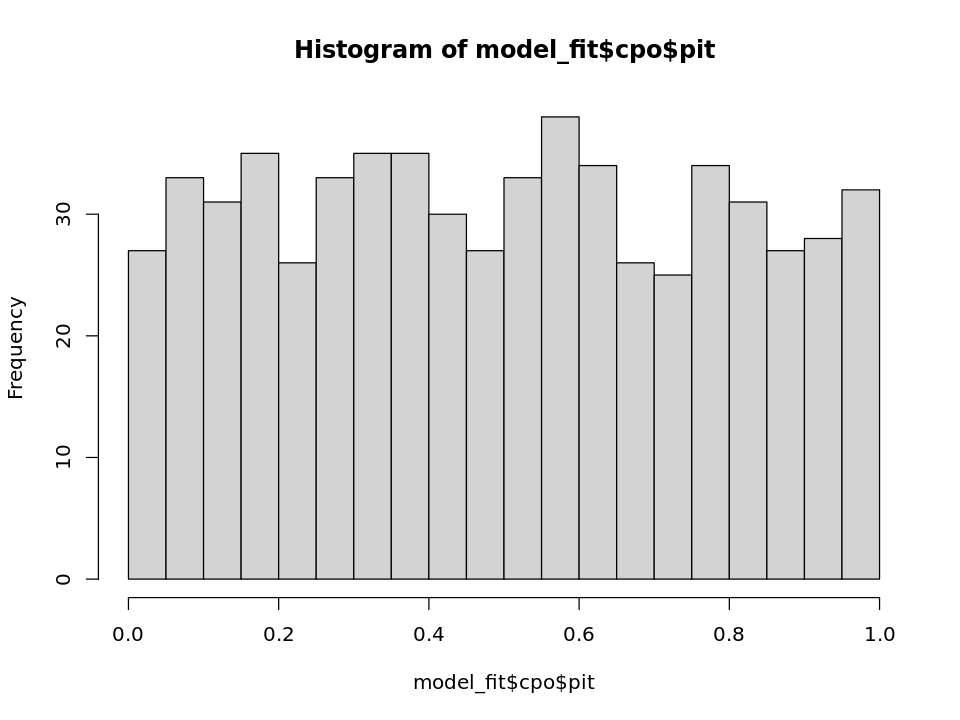

In [34]:
###############################################################
########## REPEAT STEPS ABOVE FOR MODELING OF VOLUME ##########
###############################################################
options(repr.plot.width=8, repr.plot.height=6)
Sudan <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Sudan_NE.gpkg")
Sudan <- Sudan %>% st_transform(crs=6933)

DATA <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA.csv")
DATA <- DATA[DATA$gedi.agbd > 0,]
DATA <- DATA[DATA$Total.volume..m3.ha. > 0,]
factor <- (1/3)
DATA$Total.volume..m3.ha. <- (DATA$Total.volume..m3.ha.)^factor

loc.plot <- data.matrix(as.data.frame(cbind(DATA$X,DATA$Y)))
nfi.agbd <- DATA$Total.volume..m3.ha. 
gedi.agbd <- DATA$gedi.agbd
HANSEN.tc <- DATA$HANSEN.tc
CCI.agb <- DATA$CCI.agb
FNF.prob <- DATA$FNF.prob

max.edge = 20*10^3
Sudan.buffer = st_buffer(Sudan, dist = max.edge*5) # We also make a 5 km buffer around Sudan to prevent boundary effects.
mesh = inla.mesh.2d(boundary = list(as(Sudan, "Spatial"), as(Sudan.buffer, "Spatial")), max.edge = c(max.edge, 3*max.edge), cutoff = 2*max.edge/3, offset = c(max.edge, 5*max.edge)) 
k = mesh$n ### This is the resulting number of vertices
loc.plot <- data.matrix(loc.plot) #In case loc.plot is a df rather than matrix, use "loc.plot <- data.matrix(loc.plot)"
plot(mesh)

n.plot = nrow(loc.plot)
A.plot = inla.spde.make.A(mesh = mesh, loc = loc.plot) # make a new projector matrix with the new mesh and the same plot locations. 

# Priors for the varying intercept alpha_tilde
spde.alpha = inla.spde2.pcmatern(mesh, 
                                 prior.range = c(30*10^3, 0.01), # This says the probability that the range is LESS than 30 km is 0.01
                                 prior.sigma = c(60, 0.01)) # This says the probability that the SD is GREATER than 60 Mg/ha is 0.01

# Priors for the varying coefficient beta_tilde
spde.beta = inla.spde2.pcmatern(mesh, 
                                prior.range = c(30*10^3, 0.01), # Same interpretations as above here
                                prior.sigma = c(1, 0.5)) # This says the probability that the SD is GREATER than 1 is 0.5


# Priors for the varying coefficient eta_tilde
spde.eta = inla.spde2.pcmatern(mesh, 
                                prior.range = c(30*10^3, 0.01), # Same interpretations as above here
                                prior.sigma = c(1, 0.5)) # This says the probability that the SD is GREATER than 1 is 0.5


### Construct our formula #####
formula = agbd ~
  -1 + # removes the automatic intercept so you can include your named intercept
  intercept + 
  L4A + 
  FNF + 
  f(alpha.spat, model = spde.alpha) + 
  f(beta.spat, model = spde.beta) + 
  f(eta.spat, model = spde.eta)

## Arrange our data so we can supply it to INLA to input in the formula above #####
stack = inla.stack(data = list(agbd = nfi.agbd),
                   A = list(1,  
                            1, 
                            1,
                            A.plot, 
                            Diagonal(x = gedi.agbd)%*%A.plot,
                            Diagonal(x = FNF.prob)%*%A.plot), 
                   effects = list(
                     intercept = rep(1, n.plot), 
                     L4A = gedi.agbd, 
                     FNF = FNF.prob,
                     alpha.spat = 1:k, 
                     beta.spat = 1:k,
                     eta.spat = 1:k
                   ))

model_fit = inla(formula = formula, # Provide the formula
                 family = 'gaussian', # We assume our data follows a Gaussian generalized linear model (GLM)
                 data = inla.stack.data(stack), # These line and the one below are simply how we feed INLA the stack.
                 control.predictor = list(A = inla.stack.A(stack)),
                 control.compute = list(config = T, dic = T, waic = T, cpo = T),
                 control.inla = list(int.strategy = "eb"), # EB just fixes the hyperparameters at their maximum posterior (like maximum likelihood, but accounting for priors) values. The other methods manually integrate across the range of possible values.
                 verbose = TRUE)

summary(model_fit)
save(model_fit, file = "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit_VOLUME.RData")
hist(model_fit$cpo$pit, breaks = 20) 

In [35]:
PITs <- model_fit$cpo$pit
length(PITs[PITs >= 0.025 & PITs <= 0.975])/length(PITs)

[1] 0.9484702

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


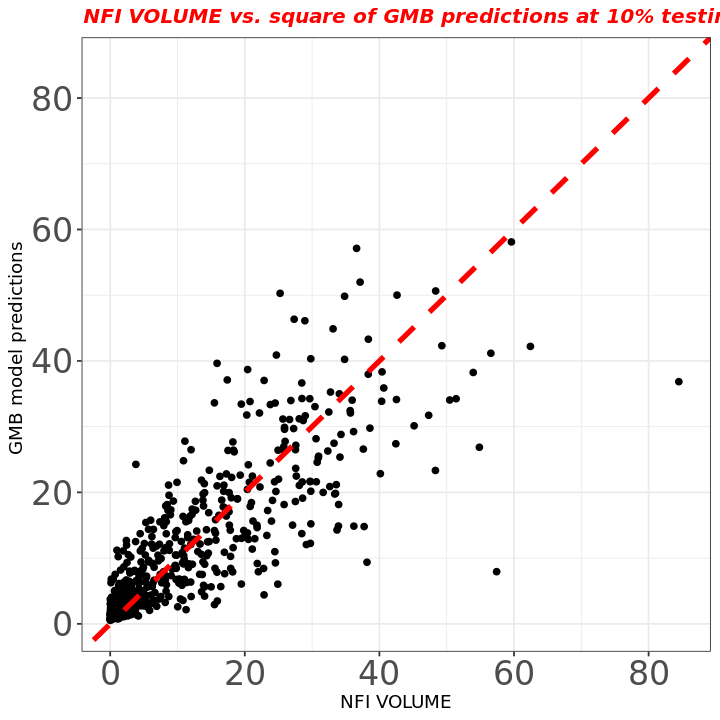

In [25]:
###############################################################
######## SCATTER PLOT OF PREDICTIONS VS. NFI-ESTIMATES ########
###############################################################
samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    gedi.agbd*L4A +
    FNF.prob*FNF +
    A.plot%*%alpha.spat[1:k] +   
    Diagonal(x = gedi.agbd)%*%A.plot%*%beta.spat[1:k] + 
    Diagonal(x = FNF.prob)%*%A.plot%*%eta.spat[1:k]) +
    rnorm(nrow(A.plot), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)
options(repr.plot.width=5, repr.plot.height=5)

OUTPUT <- do.call(rbind, Map(data.frame, PRED=pred.mu, NFI=nfi.agbd^(1/factor), PRED.SD=pred.sd, RES=nfi.agbd^(1/factor)-pred.mu))
options(repr.plot.width=6, repr.plot.height=6)
ggplot(data = OUTPUT, aes(x = NFI,y = PRED))+ geom_point()  + geom_abline(size=0.5,linetype=2,col="red",lwd=1.5) + theme_bw() + xlim(0,85) + ylim(0,85) + xlab("NFI VOLUME") + ylab("GMB model predictions ") + ggtitle("NFI VOLUME vs. square of GMB predictions at 10% testing locations") + theme(plot.title = element_text(color="red", size=12, face="bold.italic"),axis.text=element_text(size=20))

In [26]:
######################## HEURISTICS: R2 AND RMSE ###################
R2_backtrans = 1 - (sum((pred.mu - nfi.agbd^(1/factor))^2,na.rm=TRUE)/sum((nfi.agbd^(1/factor) - mean(nfi.agbd^(1/factor),na.rm=TRUE))^2,na.rm=TRUE))
R2_backtrans
RMSE = sqrt(mean((pred.mu - nfi.agbd^(1/factor))^2,na.rm=TRUE))
RMSE
BIAS = mean(pred.mu,na.rm=TRUE) - mean(nfi.agbd^(1/factor),na.rm=TRUE)
BIAS # Mg/ha

############## RATE OF OVERLAP OF CREDIBILITY INTERVALS ###################
Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025), na.rm=TRUE)
Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975), na.rm=TRUE)
sum((nfi.agbd^(1/factor) >= Q25) & (nfi.agbd^(1/factor) <= Q975), na.rm=TRUE)/length(nfi.agbd^(1/factor))
 
Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025),  na.rm = TRUE)
Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975),  na.rm = TRUE)
AGBD <- nfi.agbd^(1/factor)
Q25 <- Q25[AGBD > 10]
Q975 <- Q975[AGBD > 10]
AGBD <- AGBD[AGBD > 10]
sum((AGBD >= Q25) & (AGBD <= Q975), na.rm=TRUE)/length(AGBD)

Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025),  na.rm = TRUE)
Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975),  na.rm = TRUE)
AGBD <- nfi.agbd^(1/factor)
Q25 <- Q25[AGBD <= 10]
Q975 <- Q975[AGBD <= 10]
AGBD <- AGBD[AGBD <= 10]
sum((AGBD >= Q25) & (AGBD <= Q975), na.rm=TRUE)/length(AGBD)

[1] 0.6890588

[1] 7.133339

[1] 0.05272061

[1] 0.9597424

[1] 0.9423868

[1] 0.9683377

In [27]:
###############################################################
###############################################################
# load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit_VOLUME.RData")
# DATA_TEST <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA_TEST.csv")
# DATA_TEST <- DATA_TEST[DATA_TEST$gedi.agbd > 0,]
# DATA_TEST$Total.volume..m3.ha. <- (DATA_TEST$Total.volume..m3.ha.)^factor

# loc.plot_T <- data.matrix(as.data.frame(cbind(DATA_TEST$X,DATA_TEST$Y)))
# nfi.agbd_T <- DATA_TEST$Total.volume..m3.ha.
# GEDI.pred <- DATA_TEST$gedi.agbd
# FNF.pred <- DATA_TEST$FNF.prob

# samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
# A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# # Our model function
# pred_fun = function(...){
#   drop(intercept + 
#     GEDI.pred*L4A +
#     FNF.pred*FNF +
#     A.pred%*%alpha.spat[1:k] +   
#     Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
#     Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
#     rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
# }

# # Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
# pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
# pred.samples[pred.samples < 0] = 0

# # Model mean AGBD expectations and SD's at the grid locations
# pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
# pred.sd = apply(pred.samples^(1/factor), 1, sd)
# options(repr.plot.width=5, repr.plot.height=5)

# OUTPUT <- do.call(rbind, Map(data.frame, PRED=pred.mu, NFI=nfi.agbd_T^(1/factor), PRED.SD=pred.sd, RES=nfi.agbd_T^(1/factor)-pred.mu))
# options(repr.plot.width=6, repr.plot.height=6)
# ggplot(data = OUTPUT, aes(x = NFI,y = PRED))+ geom_point()  + geom_abline(size=0.5,linetype=2,col="red",lwd=1.5) + theme_bw() + xlim(0,80) + ylim(0,80) + xlab("NFI Volume") + ylab("GMB model predictions ") + ggtitle("NFI Volume vs. square of GMB predictions at 10% testing locations") + theme(plot.title = element_text(color="red", size=12, face="bold.italic"),axis.text=element_text(size=20))

# ####################### And here are some maps to see what the predictions look like at the plot locations ##########
# ggplot() + coord_sf(crs = 6933) + 
#            geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=1) +  # make a map to see plot locations and the AGBD values at each location
#            scale_color_viridis(limits = c(0, 40)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("GMB-predicted AGBD at 10% testing locations") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

# ######################## HEURISTICS: R2 AND RMSE ###################
# R2_backtrans = 1 - (sum((pred.mu - nfi.agbd_T^(1/factor))^2,na.rm=TRUE)/sum((nfi.agbd_T^(1/factor) - mean(nfi.agbd_T^(1/factor),na.rm=TRUE))^2,na.rm=TRUE))
# R2_backtrans
# RMSE = sqrt(mean((pred.mu - nfi.agbd_T^(1/factor))^2,na.rm=TRUE))
# RMSE
# BIAS = mean(pred.mu,na.rm=TRUE) - mean(nfi.agbd_T^(1/factor),na.rm=TRUE)
# BIAS

# ############## RATE OF OVERLAP OF CREDIBILITY INTERVALS ###################
# Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025), na.rm=TRUE)
# Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975), na.rm=TRUE)
# sum((nfi.agbd_T^(1/factor) >= Q25) & (nfi.agbd_T^(1/factor) <= Q975), na.rm=TRUE)/length(nfi.agbd_T^(1/factor))
 
# Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025),  na.rm = TRUE)
# Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975),  na.rm = TRUE)
# AGBD <- nfi.agbd_T^(1/factor)
# Q25 <- Q25[AGBD > 10]
# Q975 <- Q975[AGBD > 10]
# AGBD <- AGBD[AGBD > 10]
# sum((AGBD >= Q25) & (AGBD <= Q975), na.rm=TRUE)/length(AGBD)

# Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025),  na.rm = TRUE)
# Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975),  na.rm = TRUE)
# AGBD <- nfi.agbd_T^(1/factor)
# Q25 <- Q25[AGBD <= 10]
# Q975 <- Q975[AGBD <= 10]
# AGBD <- AGBD[AGBD <= 10]
# sum((AGBD >= Q25) & (AGBD <= Q975), na.rm=TRUE)/length(AGBD)

In [45]:
###############################################################################
################ RUNNING PREDICTIONS AT STATE LEVEL FOR VOLUME ################
###############################################################################
THRESHOLD_FOREST_PROBABILITY = 10

States <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats_AGBD_FNF10percent.gpkg") %>% st_transform(crs=6933)
States["VOLUME"] <- 0
States["VOLUME_SE"] <- 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit_VOLUME.RData")
GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")

for (State_name in States$State) {
    State <- States[States$State == State_name,]
    print(paste("Processing State: ", State_name))
    
    grid_to_predict = st_make_grid(State, cellsize = c(5000,5000), what = "centers") %>% st_as_sf() %>% st_filter(State)
    grid = as.data.frame(grid_to_predict %>% st_coordinates())

    GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,250), 'mean')
    grid$GEDI.pred <- GEDI.pred

    FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,250), 'mean')
    FNF.array <- FNF.pred
    FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = NA
    FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
    grid$FNF.array = FNF.array
    
    grid_original <- grid
    grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
    grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
    loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))
    
    FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
    GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]
    
    samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
    A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 
    
    # Our model function
    pred_fun = function(...){
      drop(intercept + 
        GEDI.pred*L4A +
        FNF.pred*FNF +
        A.pred%*%alpha.spat[1:k] +   
        Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
        Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
        rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
    }
    
    # Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
    pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
    pred.samples[pred.samples < 0] = 0
    
    # Model mean VOLUME expectations and SD's at the grid locations
    pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
    pred.sd = apply(pred.samples^(1/factor), 1, sd)
    
    # Model mean VOLUME expectations and SD of the strata
    Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
    Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)
    
    print(paste0("Mean predicted VOLUME: ", Strata_mean))
    print(paste0("Predicted SD of VOLUME: ", Strata_SD))
    print("------------------------------------------------------")
    States[States$State == State_name,]$VOLUME <- Strata_mean
    States[States$State == State_name,]$VOLUME_SE <- Strata_SD
    
    ggplot() + coord_sf(crs = 6933) + 
               geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
               scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))
    
    ggplot() + coord_sf(crs = 6933) + 
               geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
               scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))
}

st_write(States, "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats_AGBD_VOLUME_FNF10percent.gpkg")

Reading layer `Sudan_Stats_AGBD_FNF10percent' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats_AGBD_FNF10percent.gpkg' 
  using driver `GPKG'
Simple feature collection with 18 features and 5 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 2104670 ymin: 1098313 xmax: 3722444 ymax: 2875238
Projected CRS: WGS 84 / NSIDC EASE-Grid 2.0 Global
[1] "Processing State:  Blue Nile"
  |======================================================================| 100%


Cannot preload entire working area of 82773237 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 31.15"
[1] "Predicted SD of VOLUME: 8.04"
[1] "------------------------------------------------------"
[1] "Processing State:  El Gadarif"
  |======================================================================| 100%


Cannot preload entire working area of 125143545 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 4.11"
[1] "Predicted SD of VOLUME: 0.9"
[1] "------------------------------------------------------"
[1] "Processing State:  Gezira State"
  |======================================================================| 100%


Cannot preload entire working area of 47729682 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 1.29"
[1] "Predicted SD of VOLUME: 0.59"
[1] "------------------------------------------------------"
[1] "Processing State:  Kassala"
  |======================================================================| 100%


Cannot preload entire working area of 112219304 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 2.19"
[1] "Predicted SD of VOLUME: 1.25"
[1] "------------------------------------------------------"
[1] "Processing State:  Khartoum State"
  |======================================================================| 100%


Cannot preload entire working area of 51091250 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 1.87"
[1] "Predicted SD of VOLUME: 0.9"
[1] "------------------------------------------------------"
[1] "Processing State:  Northern State"
  |======================================================================| 100%


Cannot preload entire working area of 582827913 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 2.46"
[1] "Predicted SD of VOLUME: 2.11"
[1] "------------------------------------------------------"
[1] "Processing State:  Northern Darfur"
  |======================================================================| 100%


Cannot preload entire working area of 539640603 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 4.97"
[1] "Predicted SD of VOLUME: 0.75"
[1] "------------------------------------------------------"
[1] "Processing State:  Northern Kordufan"
  |======================================================================| 100%


Cannot preload entire working area of 314593773 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 3.4"
[1] "Predicted SD of VOLUME: 0.67"
[1] "------------------------------------------------------"
[1] "Processing State:  Red Sea"
  |======================================================================| 100%


Cannot preload entire working area of 432950017 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 9.41"
[1] "Predicted SD of VOLUME: 4.93"
[1] "------------------------------------------------------"
[1] "Processing State:  River Nile"
  |======================================================================| 100%


Cannot preload entire working area of 304526480 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 1.84"
[1] "Predicted SD of VOLUME: 1.38"
[1] "------------------------------------------------------"
[1] "Processing State:  Sinnar"
  |======================================================================| 100%


Cannot preload entire working area of 88727240 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 11.45"
[1] "Predicted SD of VOLUME: 2.22"
[1] "------------------------------------------------------"
[1] "Processing State:  Southern Darfur"
  |======================================================================| 100%


Cannot preload entire working area of 184277600 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 24.21"
[1] "Predicted SD of VOLUME: 2.97"
[1] "------------------------------------------------------"
[1] "Processing State:  Southern Kordufan"
  |======================================================================| 100%


Cannot preload entire working area of 136706256 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 22.48"
[1] "Predicted SD of VOLUME: 6.78"
[1] "------------------------------------------------------"
[1] "Processing State:  Cantral Darfur"
  |======================================================================| 100%


Cannot preload entire working area of 74824421 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 15.4"
[1] "Predicted SD of VOLUME: 1.33"
[1] "------------------------------------------------------"
[1] "Processing State:  White Nile"
  |======================================================================| 100%


Cannot preload entire working area of 75385858 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 1.47"
[1] "Predicted SD of VOLUME: 0.43"
[1] "------------------------------------------------------"
[1] "Processing State:  Western Darfur"
  |======================================================================| 100%


Cannot preload entire working area of 57128032 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 5.74"
[1] "Predicted SD of VOLUME: 1.03"
[1] "------------------------------------------------------"
[1] "Processing State:  Eastern Darfur"
  |======================================================================| 100%


Cannot preload entire working area of 139066594 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 20.45"
[1] "Predicted SD of VOLUME: 1.46"
[1] "------------------------------------------------------"
[1] "Processing State:  Western Kordufan"
  |======================================================================| 100%


Cannot preload entire working area of 190746046 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted VOLUME: 21.27"
[1] "Predicted SD of VOLUME: 1.51"
[1] "------------------------------------------------------"
Layer Sudan_Stats_AGBD_VOLUME_FNF10percent in dataset /projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_states/Sudan_Stats_AGBD_VOLUME_FNF10percent.gpkg already exists:
use either append=TRUE to append to layer or append=FALSE to overwrite layer


ERROR: Error in eval(expr, envir, enclos): Dataset already exists.



  |======================================================================| 100%


Cannot preload entire working area of 1329484644 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


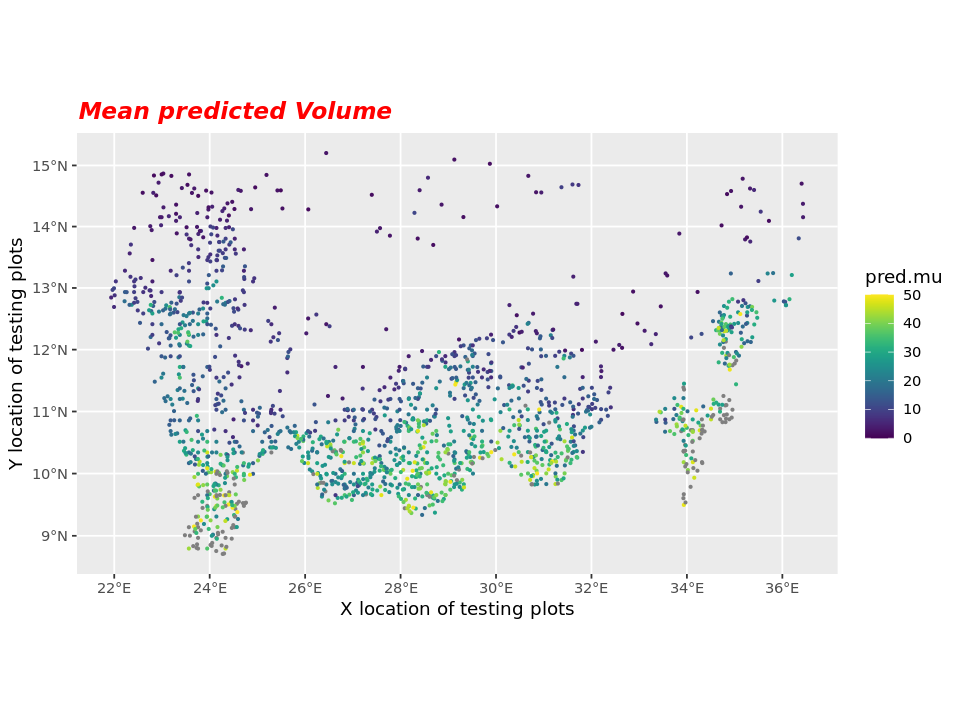

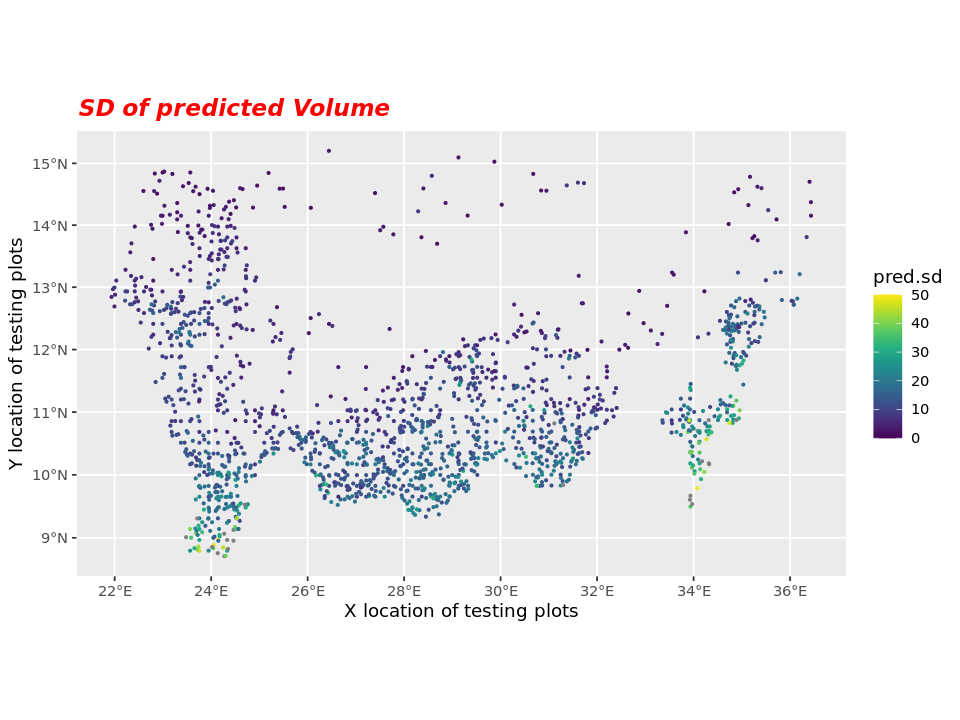

In [9]:
###############################################################
####### PREDICTIONS AT SITES OF DEGRADATION ###################
###############################################################
THRESHOLD_FOREST_PROBABILITY = 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit_VOLUME.RData")
GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")

# DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Degradation_samples.csv")
DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Stable_forest_sudan_04012025.csv")
grid_to_predict <- st_as_sf(DEG, coords = c("location_x", "location_y"), crs = 4326) %>% st_transform("epsg:6933")
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,21), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,21), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = 1 #NA (we want to prepare ALL degrdation sites, irrespective of FNF)
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
DEG <- DEG[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 1000, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

DEG['VOLUME'] <- pred.mu
DEG['VOLUME_SE'] <- pred.sd
write.csv(DEG,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Stable_forest_sudan_04012025_Volume.csv",row.names=FALSE) #Save the data

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted Volume") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted Volume") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

In [ ]:
###############################################################
####### PREDICTIONS AT SITES OF DEGRADATION REDONE ############
###############################################################
THRESHOLD_FOREST_PROBABILITY = 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit_VOLUME.RData")
GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")

# DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Degradation_samples.csv")
# DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Stable_forest_sudan_04012025.csv")
DEG <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/NFI_grid_sudan_CE_assessment.csv")
grid_to_predict <- st_as_sf(DEG, coords = c("location_x", "location_y"), crs = 4326) %>% st_transform("epsg:6933")
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,21), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,21), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = 1 #NA (we want to prepare ALL degrdation sites, irrespective of FNF)
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
DEG <- DEG[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 1000, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

DEG['VOLUME'] <- pred.mu
DEG['VOLUME_SE'] <- pred.sd
write.csv(DEG,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Degradation/Stable_forest_sudan_04012025_Volume.csv",row.names=FALSE) #Save the data

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted Volume") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted Volume") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

Reading layer `Id_4' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Id_4.gpkg' 
  using driver `GPKG'
Simple feature collection with 1 feature and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 21.84084 ymin: 8.684103 xmax: 36.5489 ymax: 14.86612
Geodetic CRS:  WGS 84
Reading layer `volume_biomass_carbon_by_suandplot' from data source 
  `/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg' 
  using driver `GPKG'
Simple feature collection with 784 features and 10 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 22.2243 ymin: 9.307635 xmax: 37.53202 ymax: 21.83538
Geodetic CRS:  WGS 84


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


  |======================================================================| 100%


Cannot preload entire working area of 1270342326 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean direct estimate AGBD: 10.1235880496183"
[1] "Mean predicted AGBD: 15.98"
[1] "Predicted SD of AGBD: 3.43"


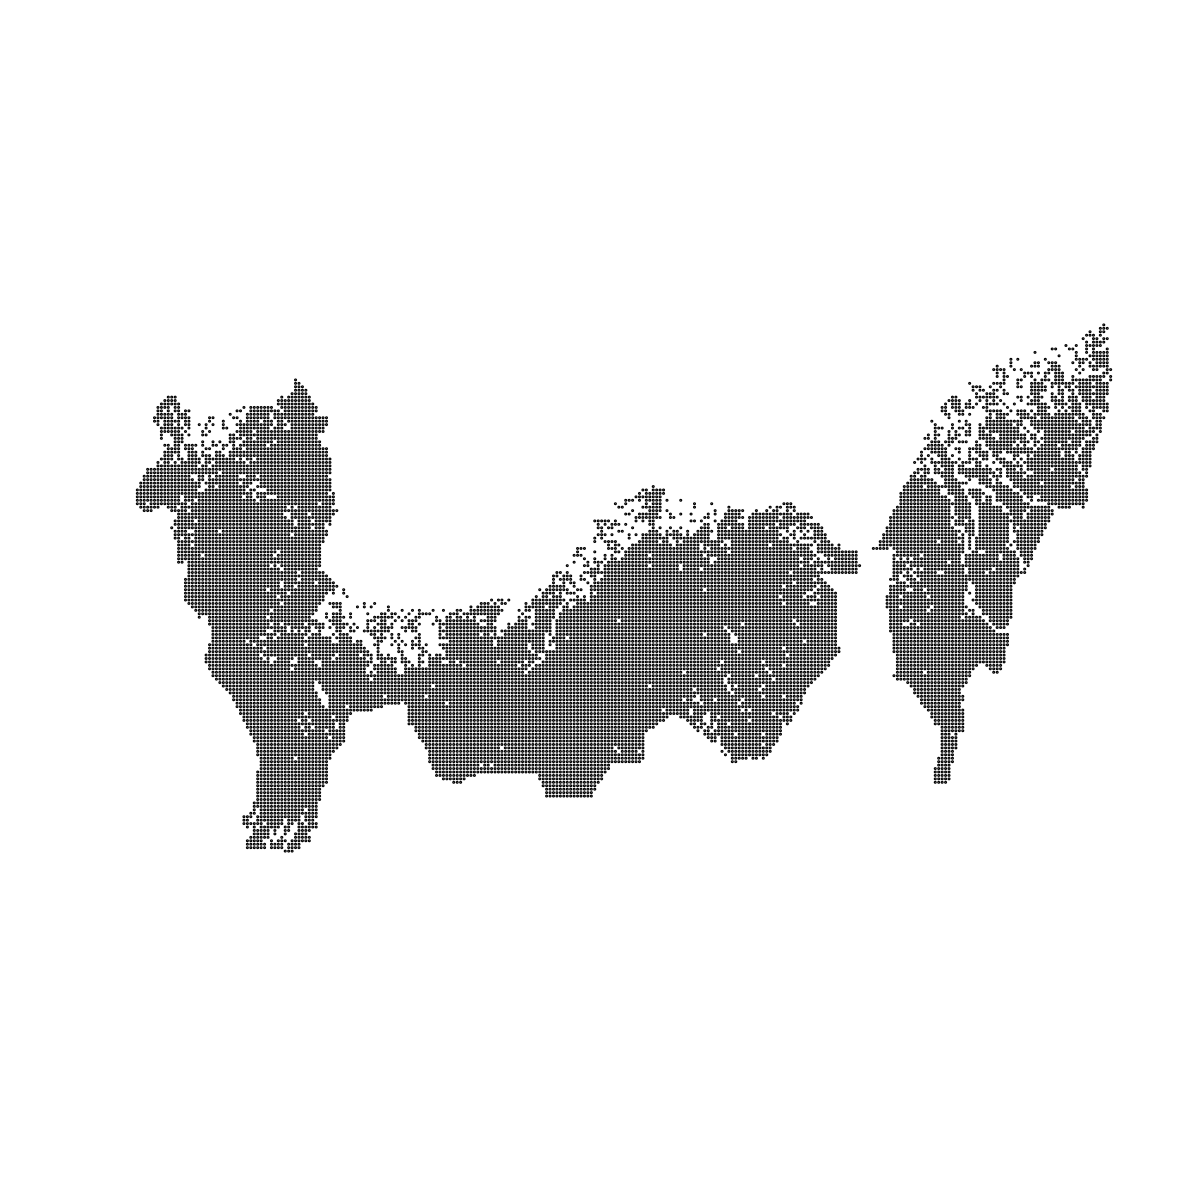

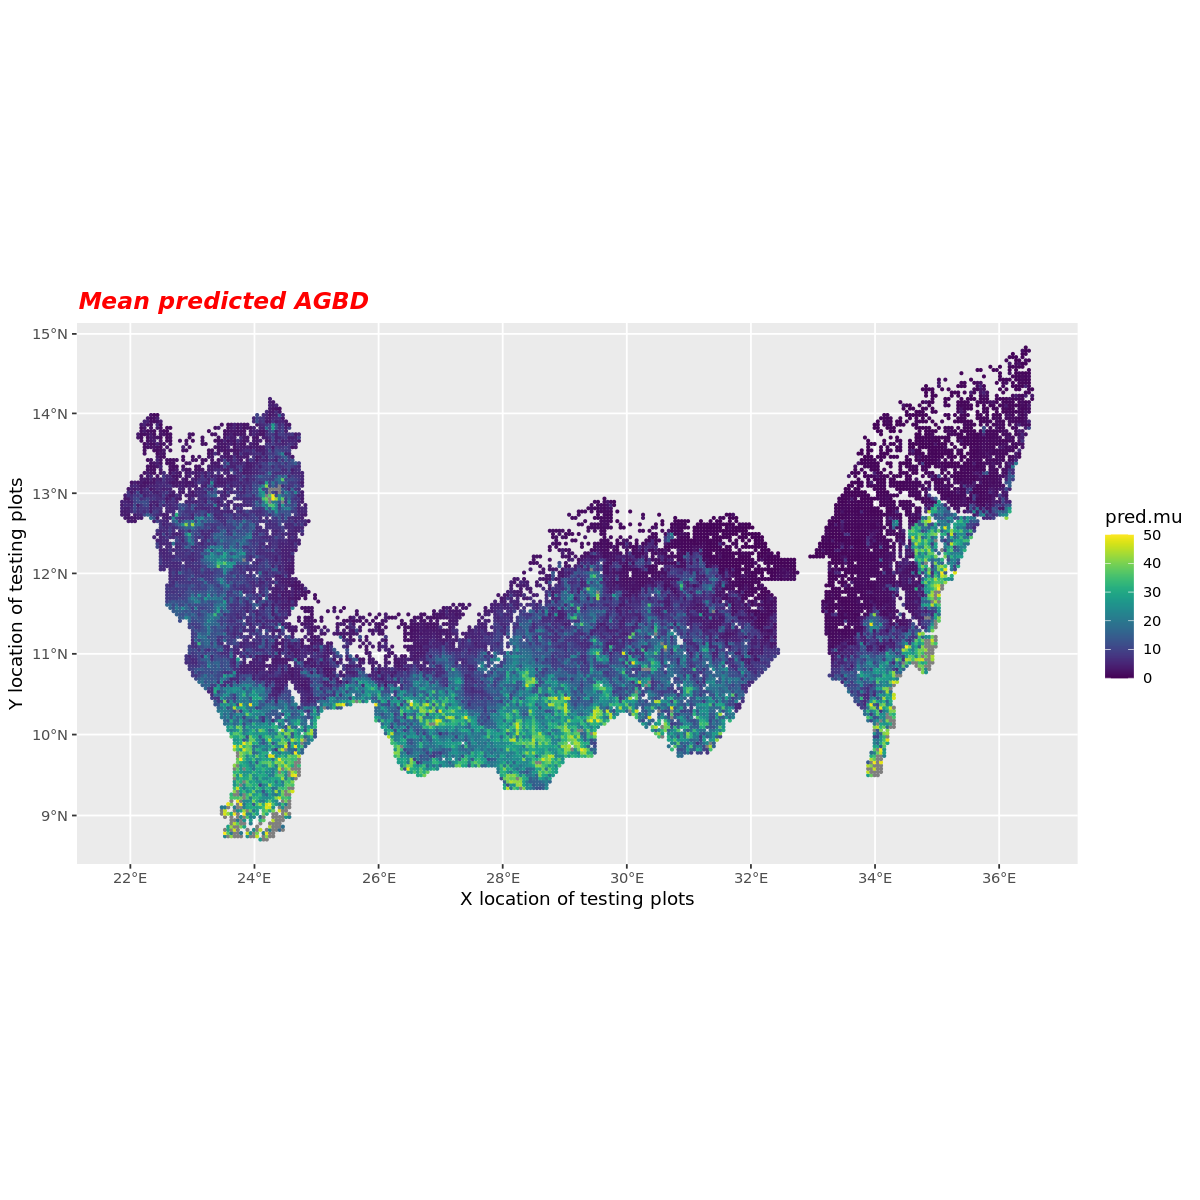

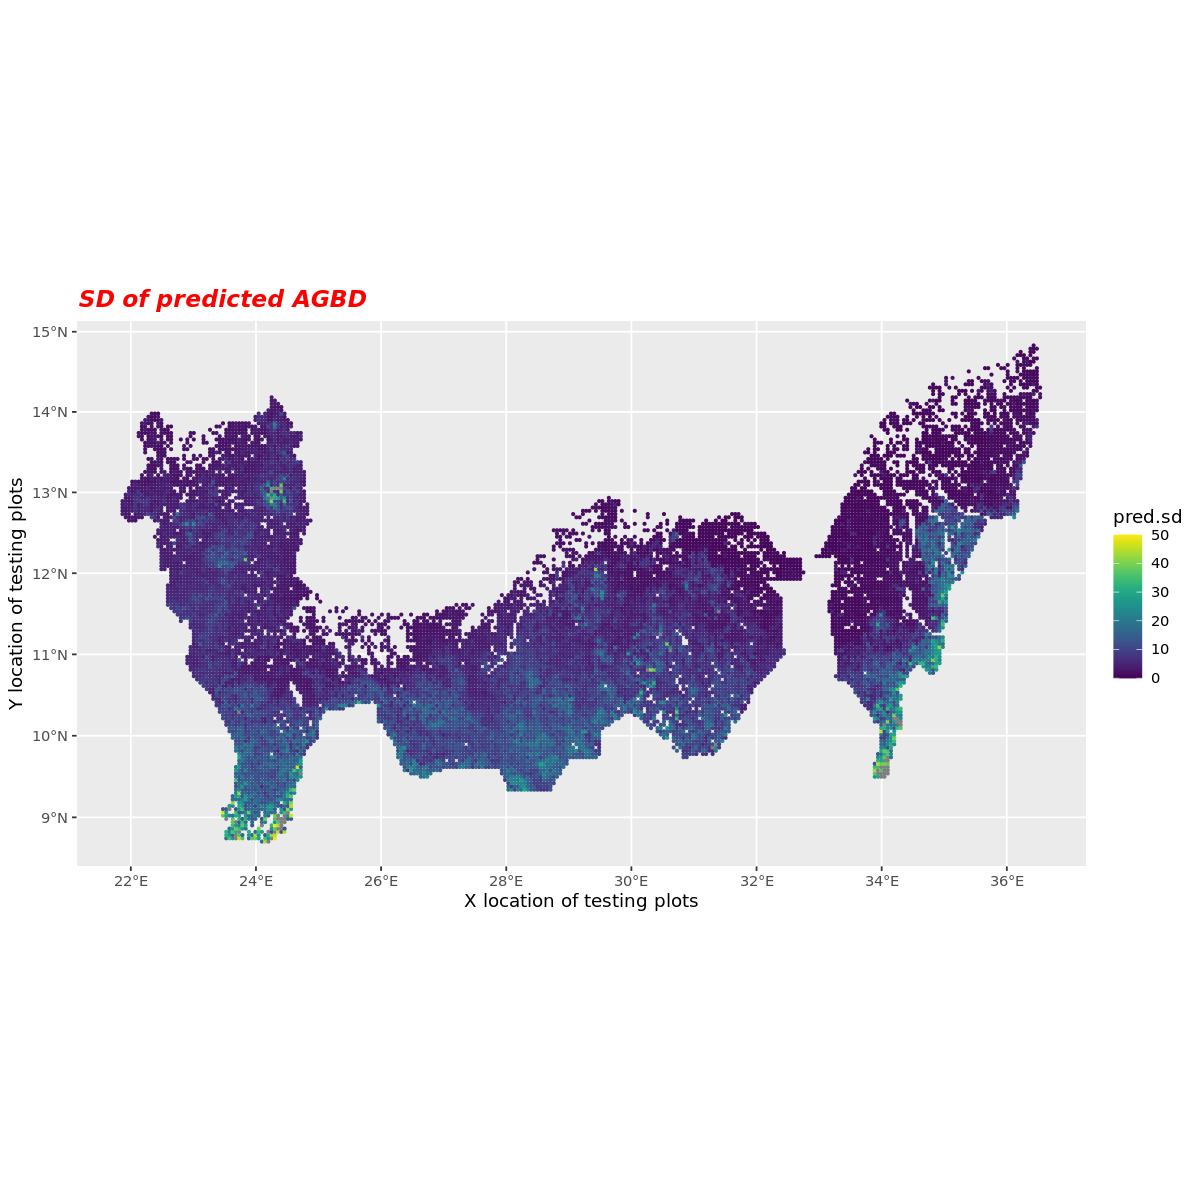

In [26]:
# options(repr.plot.width=10, repr.plot.height=10)
# THRESHOLD_FOREST_PROBABILITY = 10

# Sudan <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Id_4.gpkg")
# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
# NFI_csv = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# NFI['FNF'] = NFI_csv$FNF
# NFI_subset <- st_intersection(NFI, Sudan)
# NFI_subset <- NFI_subset[NFI_subset$FNF >= THRESHOLD_FOREST_PROBABILITY,]
# DIRECT_ESTIMATE <- mean(NFI_subset$AG_Biomass..Mg.ha.,na.rm=TRUE)
# Sudan <- Sudan %>% st_transform(crs=6933)

# load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
# grid_to_predict = st_make_grid(Sudan, cellsize = c(5000,5000), what = "centers") %>% st_as_sf() %>% st_filter(Sudan)
# grid = as.data.frame(grid_to_predict %>% st_coordinates())

# GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
# GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,250), 'mean')
# grid$GEDI.pred <- GEDI.pred

# FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")
# FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,250), 'mean')
# FNF.array <- FNF.pred
# FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = NA
# FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
# grid$FNF.array = FNF.array

# grid_original <- grid
# grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
# grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
# plot(grid_to_predict,cex=0.2)
# loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

# FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
# GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

# samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
# A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# # Our model function
# pred_fun = function(...){
#   drop(intercept + 
#     GEDI.pred*L4A +
#     FNF.pred*FNF +
#     A.pred%*%alpha.spat[1:k] +   
#     Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
#     Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
#     rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
# }

# # Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
# pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
# pred.samples[pred.samples < 0] = 0

# # Model mean AGBD expectations and SD's at the grid locations
# pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
# pred.sd = apply(pred.samples^(1/factor), 1, sd)

# # Model mean AGBD expectations and SD of the strata
# Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
# Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)

# print(paste0("Mean direct estimate AGBD: ", DIRECT_ESTIMATE))
# print(paste0("Mean predicted AGBD: ", Strata_mean))
# print(paste0("Predicted SD of AGBD: ", Strata_SD))

# ggplot() + coord_sf(crs = 6933) + 
#            geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
#            scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

# ggplot() + coord_sf(crs = 6933) + 
#            geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
#            scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

Reading layer `Id_3' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Id_3.gpkg' 
  using driver `GPKG'
Simple feature collection with 1 feature and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 22.38587 ymin: 11.47029 xmax: 37.45337 ymax: 17.31446
Geodetic CRS:  WGS 84
Reading layer `volume_biomass_carbon_by_suandplot' from data source 
  `/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg' 
  using driver `GPKG'
Simple feature collection with 784 features and 10 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 22.2243 ymin: 9.307635 xmax: 37.53202 ymax: 21.83538
Geodetic CRS:  WGS 84


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


  |======================================================================| 100%


Cannot preload entire working area of 1216768000 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean direct estimate AGBD: 2.00540488235294"
[1] "Mean predicted AGBD: 1.9"
[1] "Predicted SD of AGBD: 0.19"


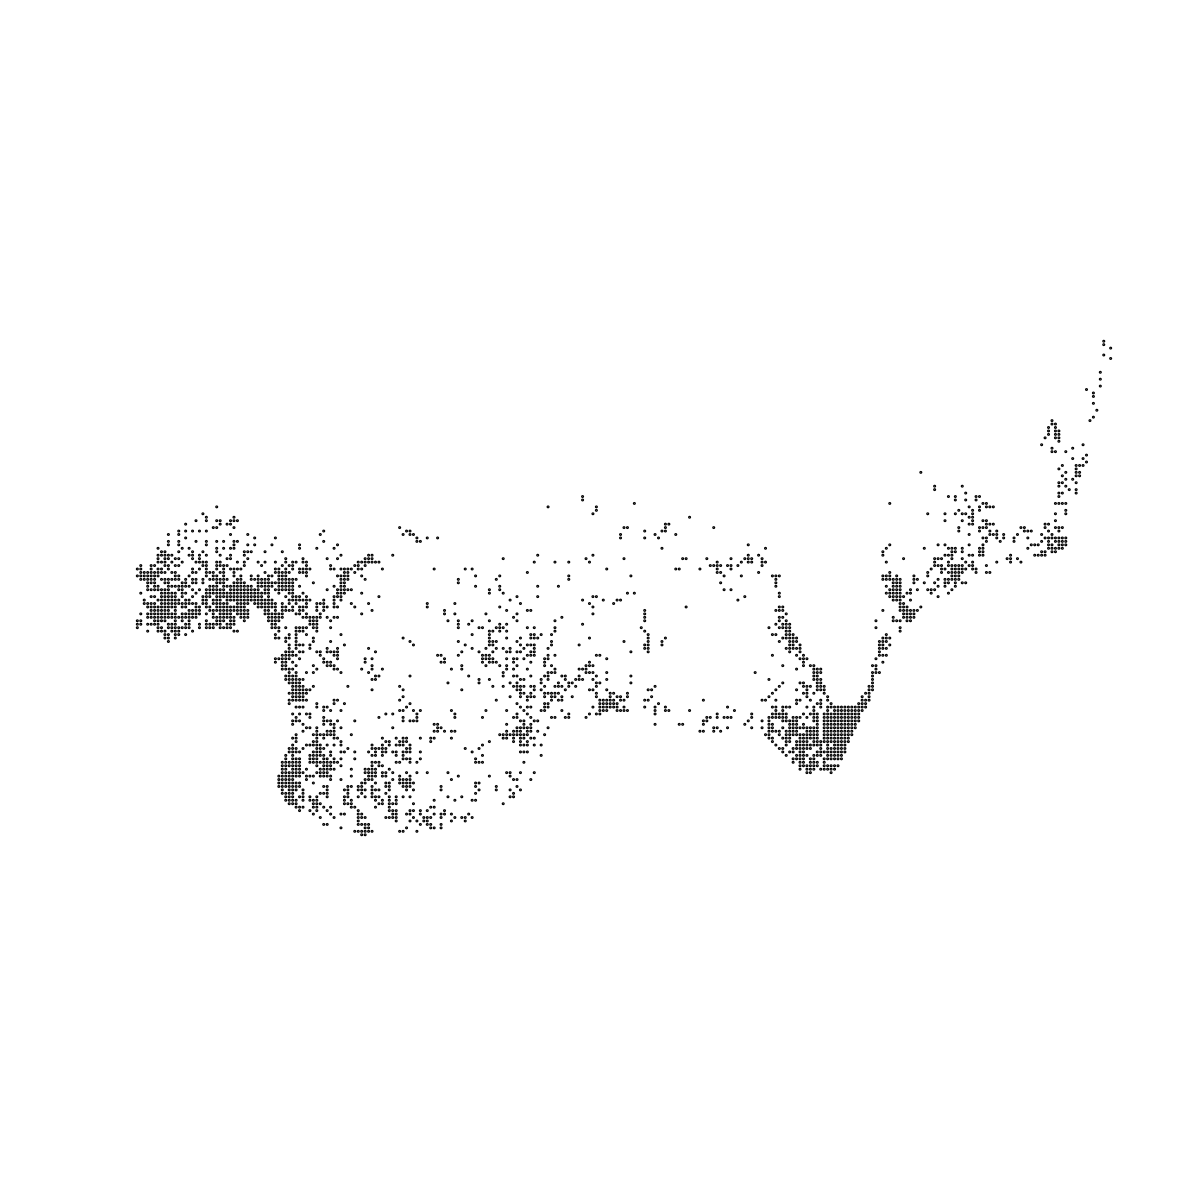

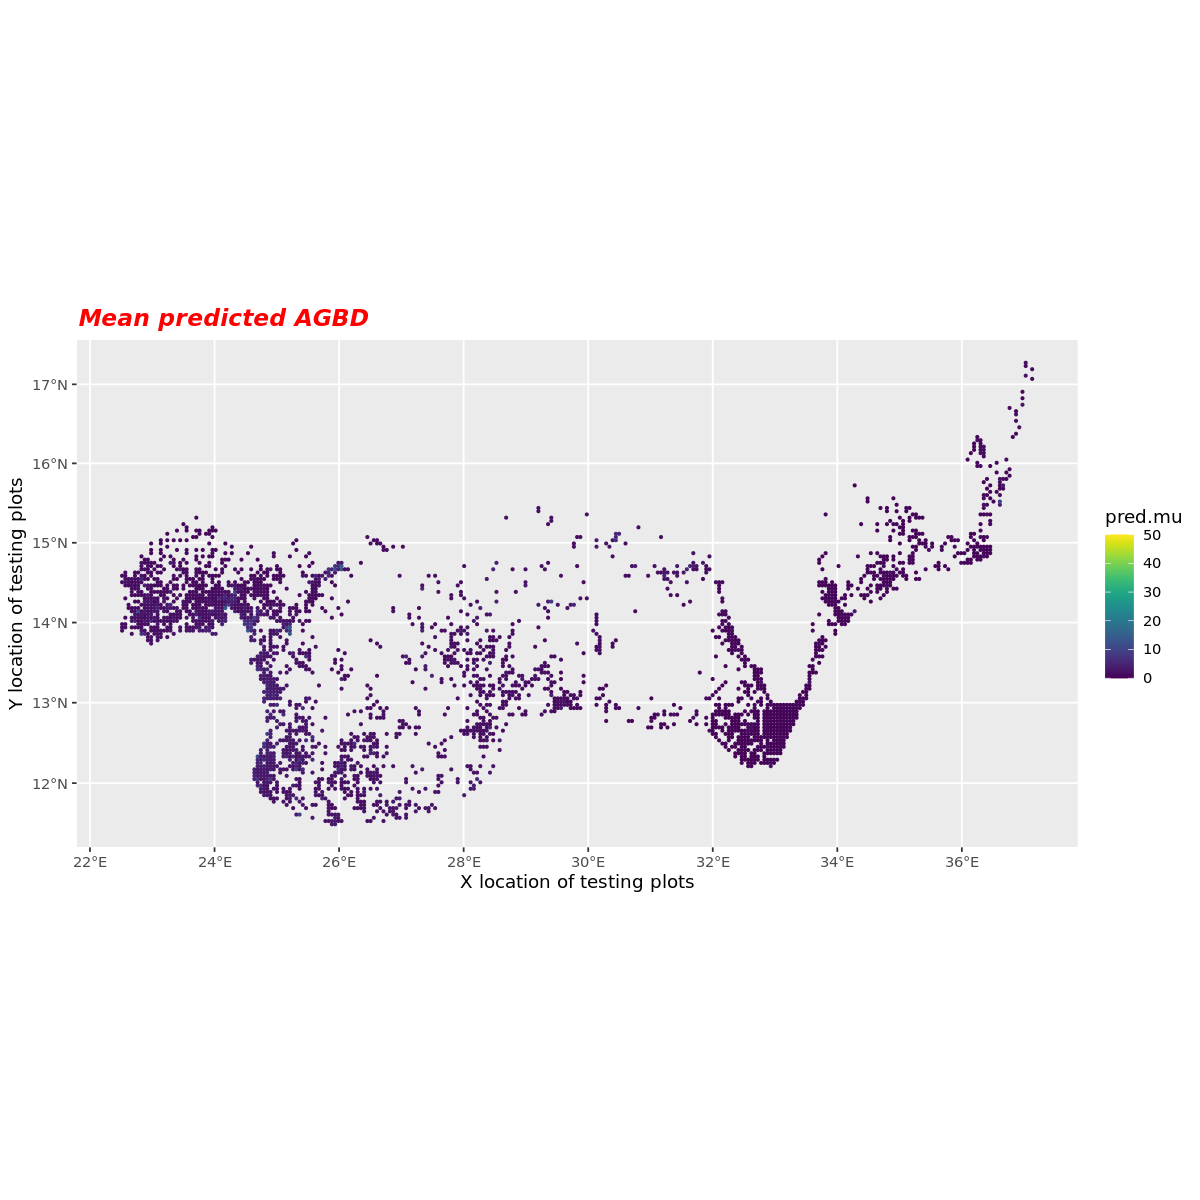

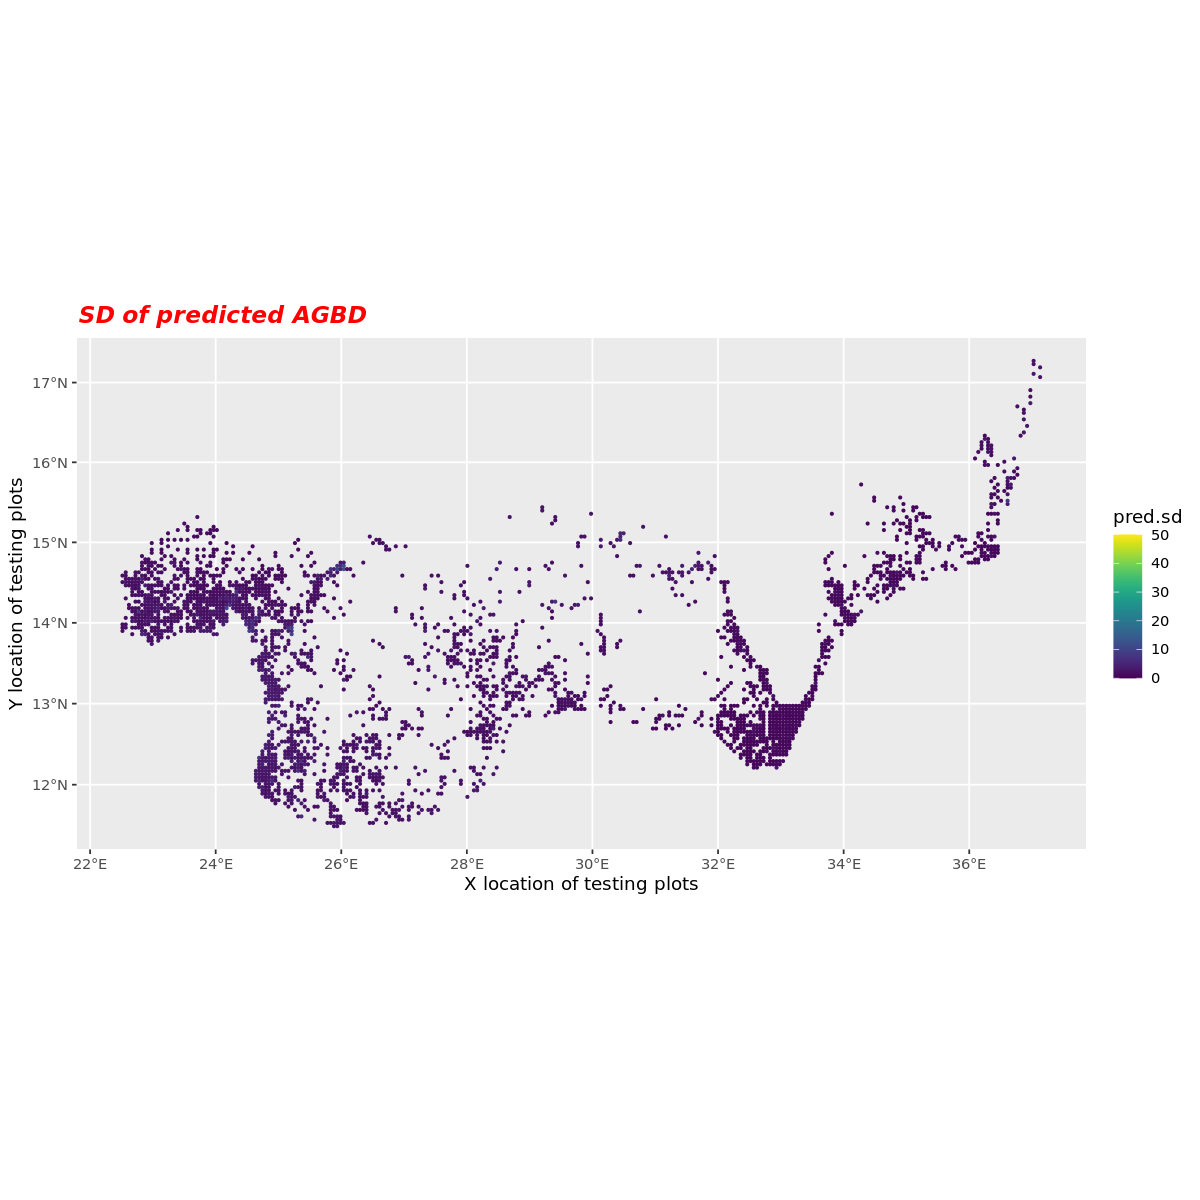

In [27]:
options(repr.plot.width=10, repr.plot.height=10)

Sudan <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Id_3.gpkg")
NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
NFI_csv = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
NFI['FNF'] = NFI_csv$FNF
NFI_subset <- st_intersection(NFI, Sudan)
NFI_subset <- NFI_subset[NFI_subset$FNF >= THRESHOLD_FOREST_PROBABILITY,]
DIRECT_ESTIMATE <- mean(NFI_subset$AG_Biomass..Mg.ha.,na.rm=TRUE)
Sudan <- Sudan %>% st_transform(crs=6933)

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
grid_to_predict = st_make_grid(Sudan, cellsize = c(5000,5000), what = "centers") %>% st_as_sf() %>% st_filter(Sudan)
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,250), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")
FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,250), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = NA
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
plot(grid_to_predict,cex=0.2)
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

# Model mean AGBD expectations and SD of the strata
Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)

print(paste0("Mean direct estimate AGBD: ", DIRECT_ESTIMATE))
print(paste0("Mean predicted AGBD: ", Strata_mean))
print(paste0("Predicted SD of AGBD: ", Strata_SD))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

Reading layer `Id_2' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Id_2.gpkg' 
  using driver `GPKG'
Simple feature collection with 1 feature and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 22.76638 ymin: 12.97285 xmax: 38.58349 ymax: 20.97901
Geodetic CRS:  WGS 84
Reading layer `volume_biomass_carbon_by_suandplot' from data source 
  `/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg' 
  using driver `GPKG'
Simple feature collection with 784 features and 10 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 22.2243 ymin: 9.307635 xmax: 37.53202 ymax: 21.83538
Geodetic CRS:  WGS 84


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


  |======================================================================| 100%


Cannot preload entire working area of 1718622370 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean direct estimate AGBD: 0.100421"
[1] "Mean predicted AGBD: 5.89"
[1] "Predicted SD of AGBD: 3.73"


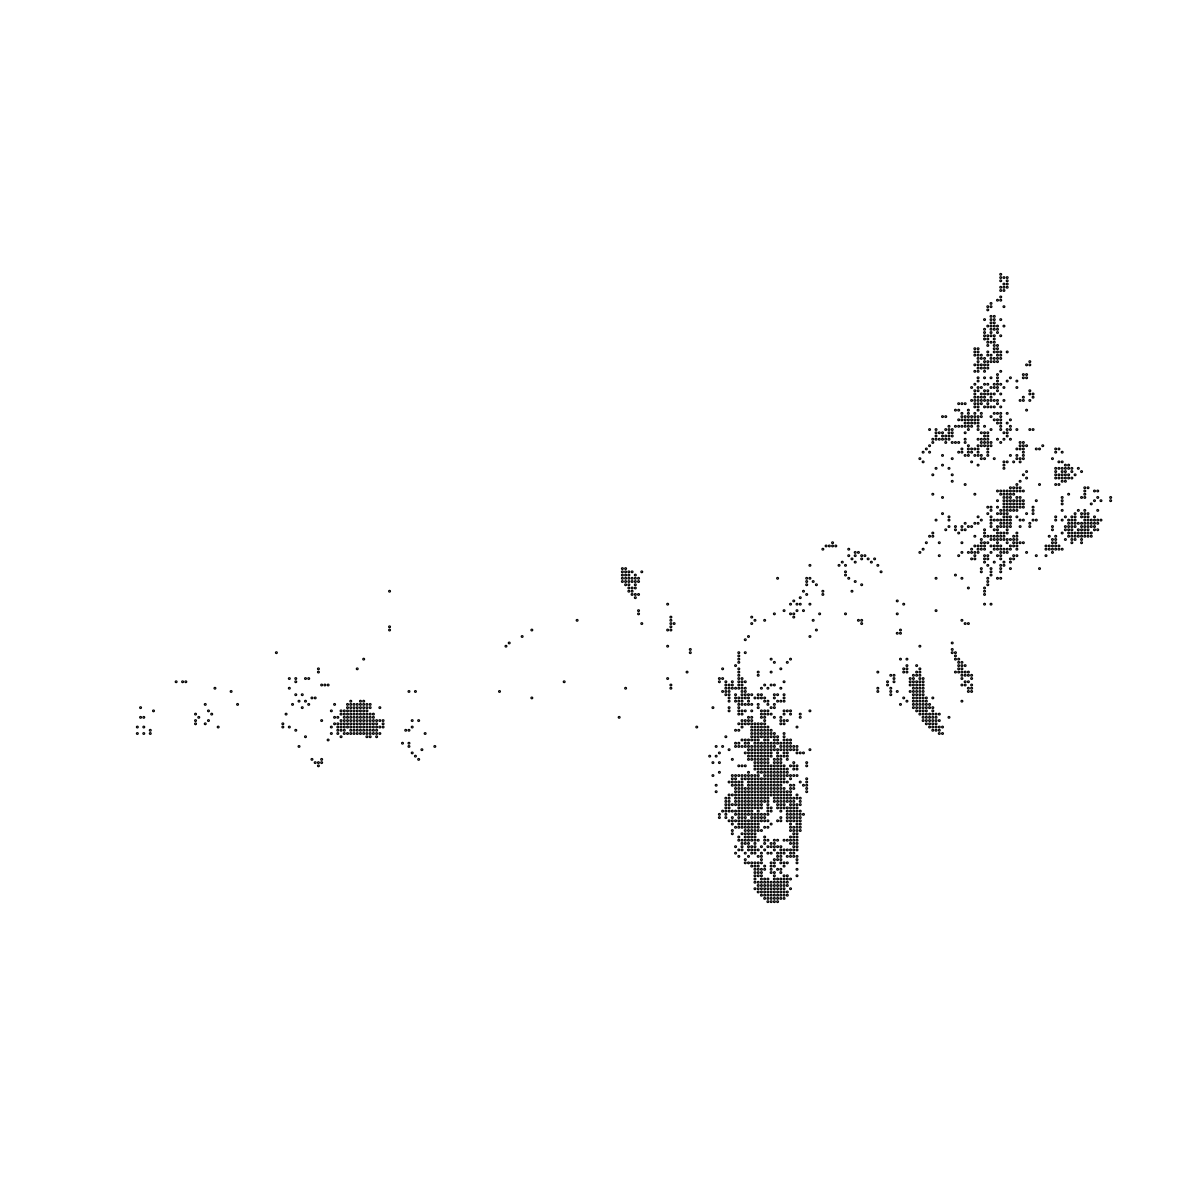

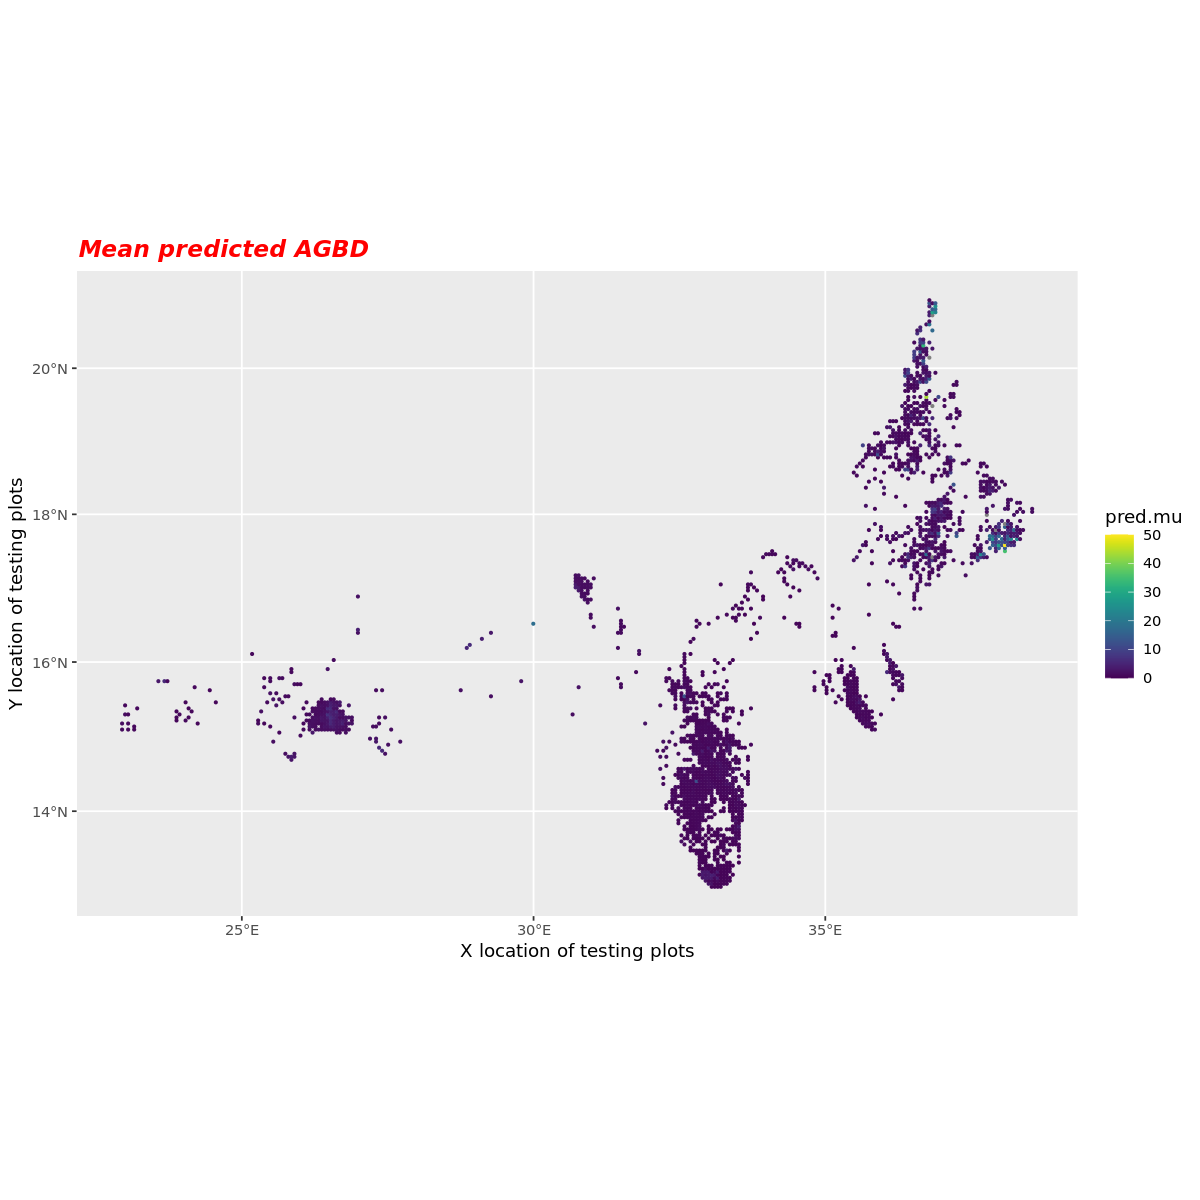

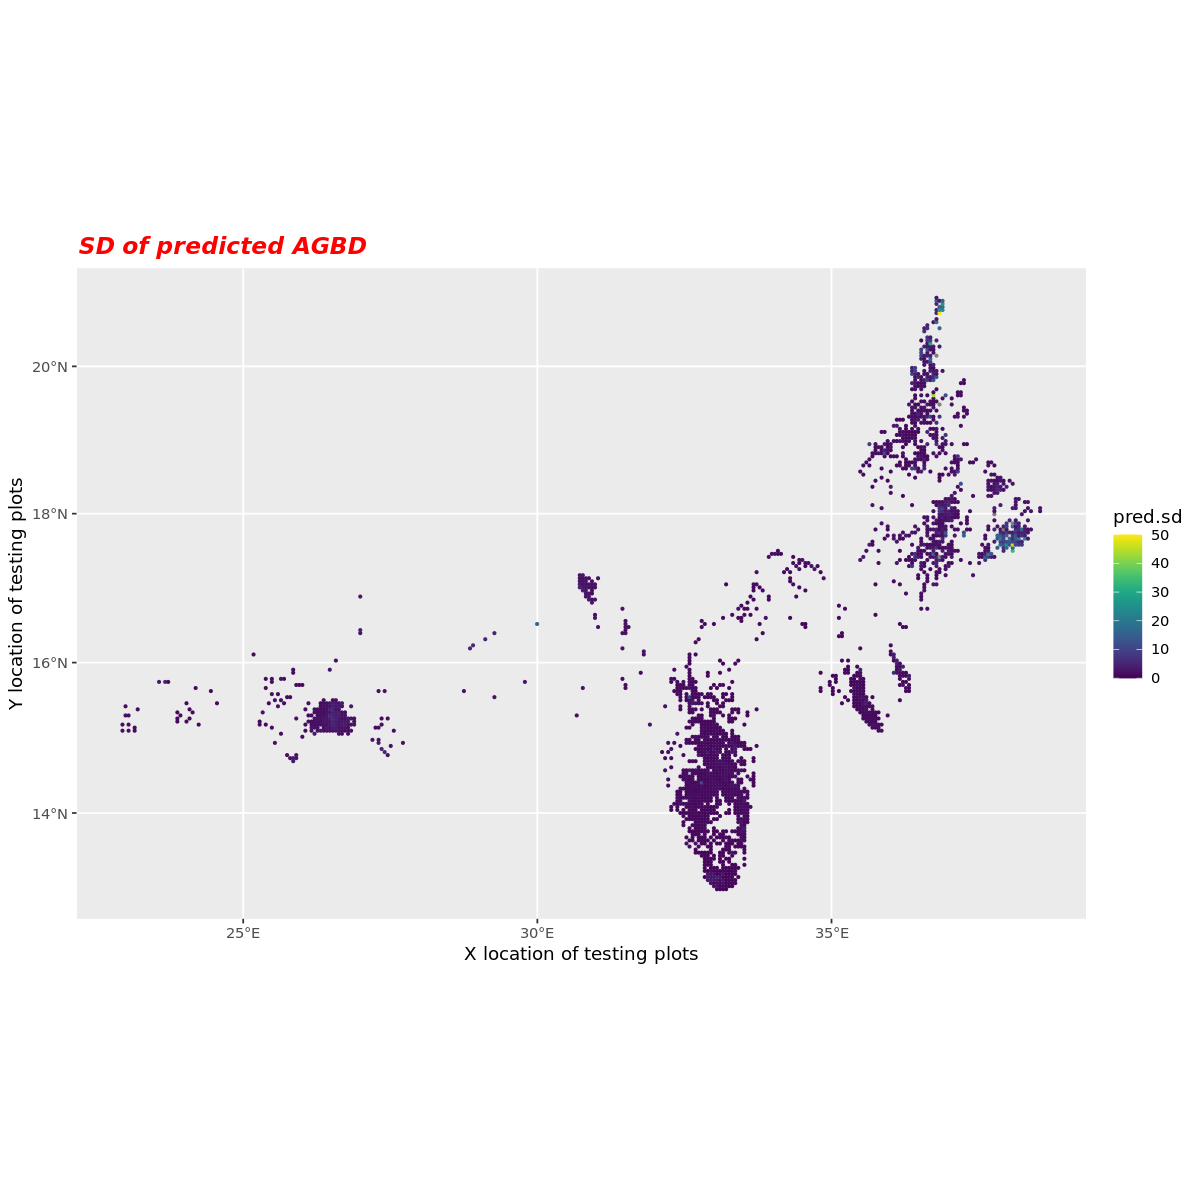

In [28]:
options(repr.plot.width=10, repr.plot.height=10)

Sudan <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Id_2.gpkg")
NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
NFI_csv = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
NFI['FNF'] = NFI_csv$FNF
NFI_subset <- st_intersection(NFI, Sudan)
NFI_subset <- NFI_subset[NFI_subset$FNF >= THRESHOLD_FOREST_PROBABILITY,]
DIRECT_ESTIMATE <- mean(NFI_subset$AG_Biomass..Mg.ha.,na.rm=TRUE)
Sudan <- Sudan %>% st_transform(crs=6933)

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
grid_to_predict = st_make_grid(Sudan, cellsize = c(5000,5000), what = "centers") %>% st_as_sf() %>% st_filter(Sudan)
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,250), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")
FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,250), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = NA
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
plot(grid_to_predict,cex=0.2)
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

# Model mean AGBD expectations and SD of the strata
Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)

print(paste0("Mean direct estimate AGBD: ", DIRECT_ESTIMATE))
print(paste0("Mean predicted AGBD: ", Strata_mean))
print(paste0("Predicted SD of AGBD: ", Strata_SD))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

Reading layer `Id_1' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Id_1.gpkg' 
  using driver `GPKG'
Simple feature collection with 1 feature and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 23.99951 ymin: 16.76496 xmax: 37.31689 ymax: 23.13772
Geodetic CRS:  WGS 84
Reading layer `volume_biomass_carbon_by_suandplot' from data source 
  `/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg' 
  using driver `GPKG'
Simple feature collection with 784 features and 10 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 22.2243 ymin: 9.307635 xmax: 37.53202 ymax: 21.83538
Geodetic CRS:  WGS 84


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


  |======================================================================| 100%


Cannot preload entire working area of 1117870894 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean direct estimate AGBD: NaN"
[1] "Mean predicted AGBD: 1.23"
[1] "Predicted SD of AGBD: 1.21"


Warning message:
“Removed 114 rows containing missing values or values outside the scale range
(`geom_point()`).”


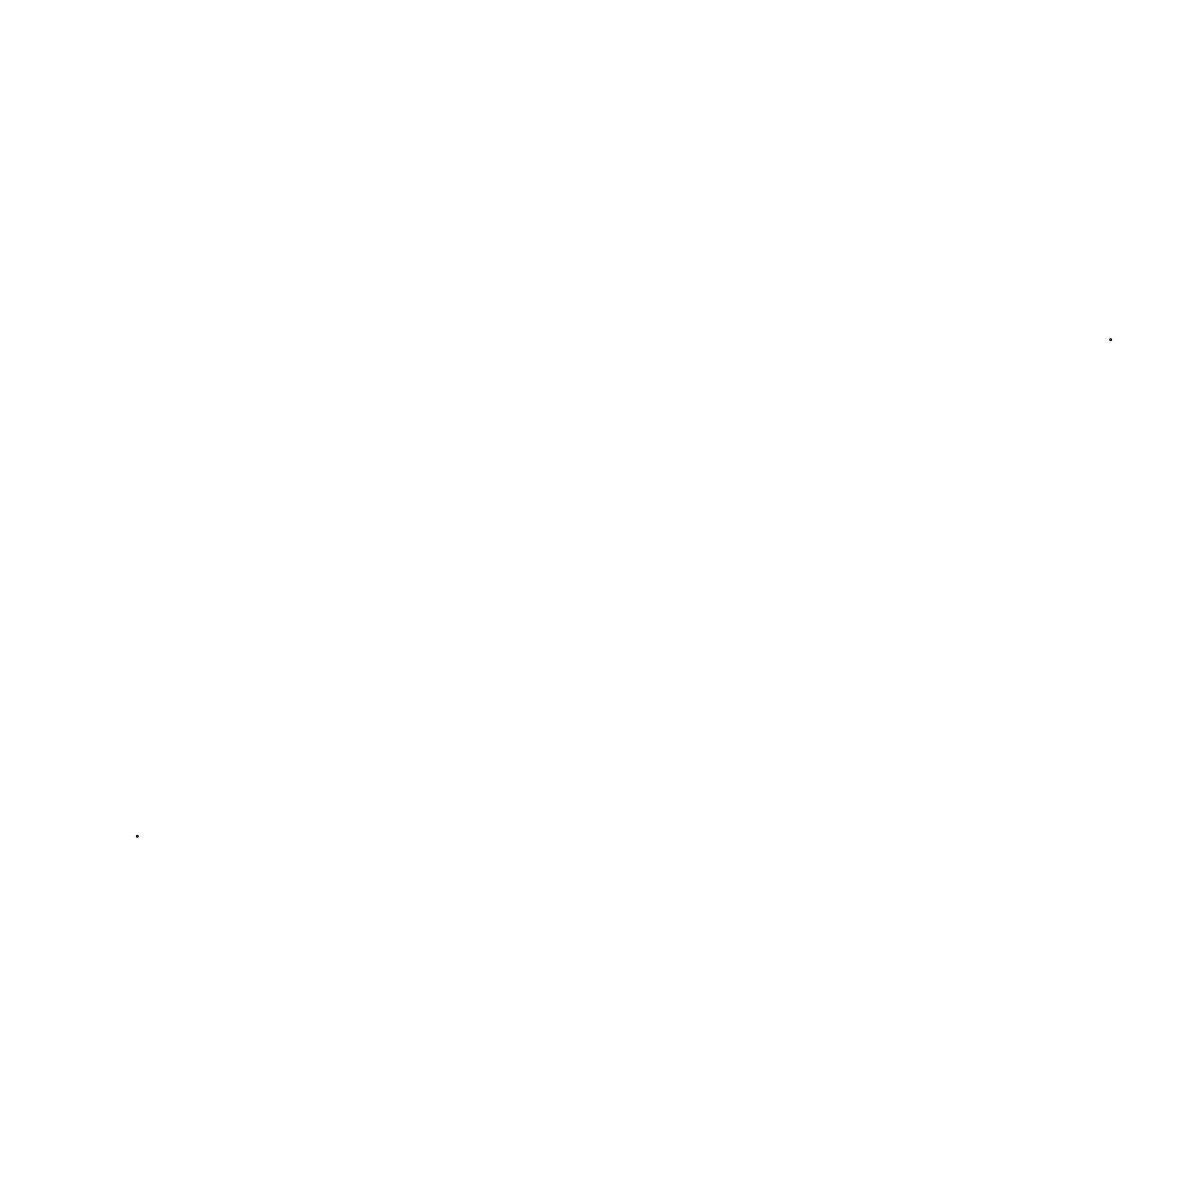

Warning message:
“Removed 114 rows containing missing values or values outside the scale range
(`geom_point()`).”


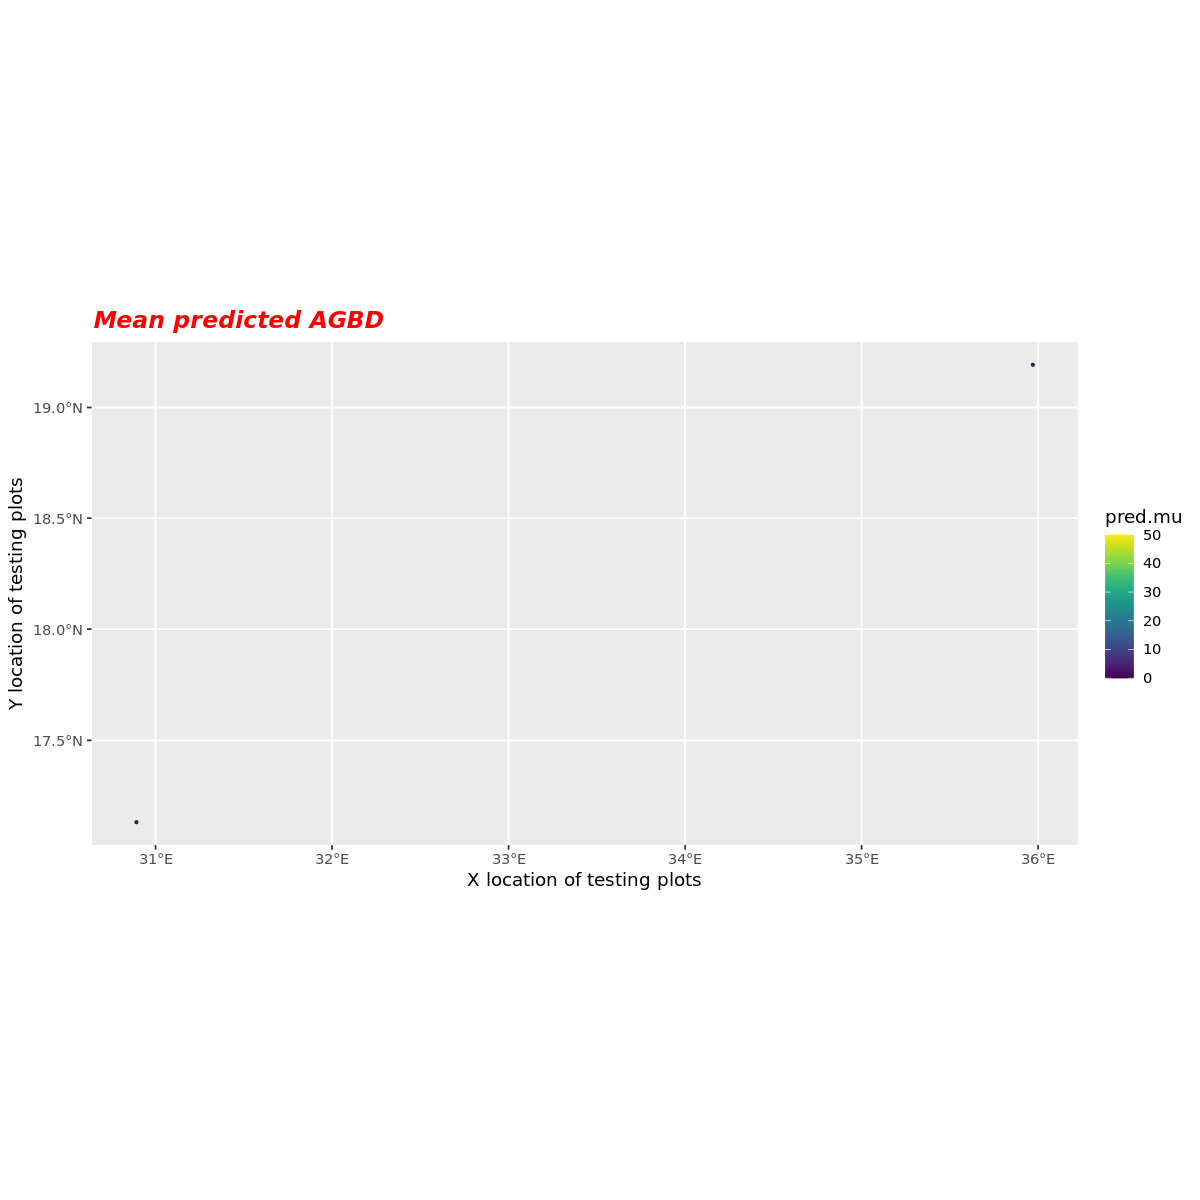

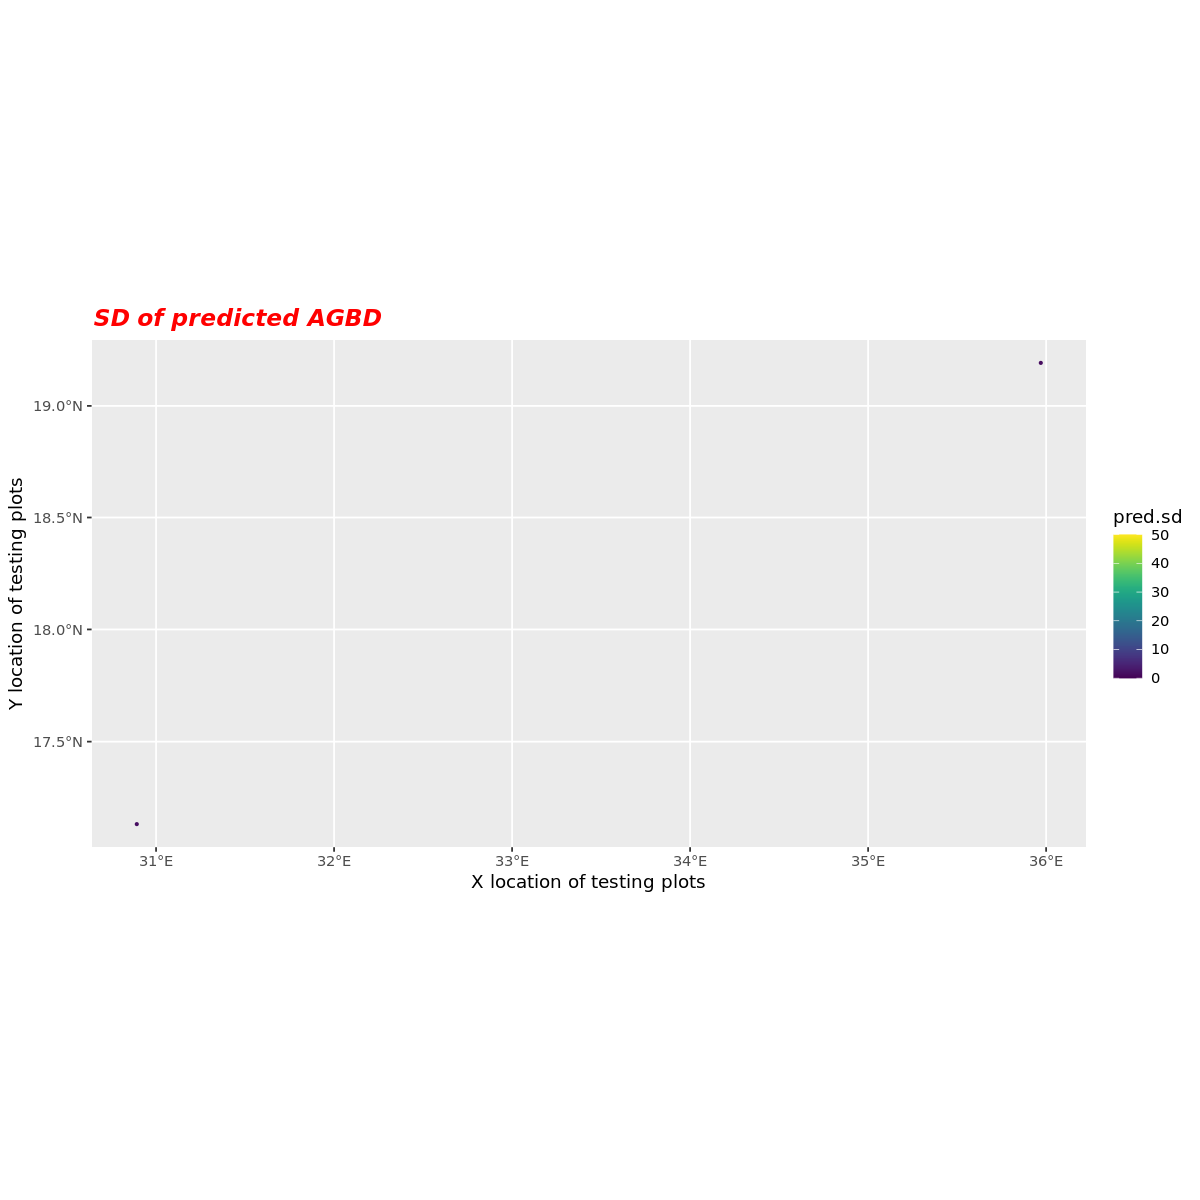

In [29]:
options(repr.plot.width=10, repr.plot.height=10)

Sudan <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Id_1.gpkg")
NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
NFI_csv = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
NFI['FNF'] = NFI_csv$FNF
NFI_subset <- st_intersection(NFI, Sudan)
NFI_subset <- NFI_subset[NFI_subset$FNF >= THRESHOLD_FOREST_PROBABILITY,]
DIRECT_ESTIMATE <- mean(NFI_subset$AG_Biomass..Mg.ha.,na.rm=TRUE)
Sudan <- Sudan %>% st_transform(crs=6933)

load("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/INLA_model_fit.RData")
grid_to_predict = st_make_grid(Sudan, cellsize = c(10000,10000), what = "centers") %>% st_as_sf() %>% st_filter(Sudan)
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif")
GEDI.pred = exactextractr::exact_extract(GEDI_L4A,st_buffer(grid_to_predict,250), 'mean')
grid$GEDI.pred <- GEDI.pred

FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif")
FNF.pred = exactextractr::exact_extract(FNF,st_buffer(grid_to_predict,250), 'mean')
FNF.array <- FNF.pred
FNF.array[FNF.array<=THRESHOLD_FOREST_PROBABILITY] = NA
FNF.array[FNF.array>THRESHOLD_FOREST_PROBABILITY] = 1
grid$FNF.array = FNF.array

grid_original <- grid
grid <- grid[(!is.na(grid$FNF.array) & grid$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$FNF.array) & grid_original$GEDI.pred>0),]
plot(grid_to_predict,cex=0.2)
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

FNF.pred <- FNF.pred[(!is.na(FNF.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(FNF.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    FNF.pred*FNF +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

# Model mean AGBD expectations and SD of the strata
Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)

print(paste0("Mean direct estimate AGBD: ", DIRECT_ESTIMATE))
print(paste0("Mean predicted AGBD: ", Strata_mean))
print(paste0("Predicted SD of AGBD: ", Strata_SD))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 50)) + xlab("X location of testing plots") + ylab("Y location of testing plots") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"))

In [18]:
# xyz_data <- data.frame(x = loc.plot_T[,1], y = loc.plot_T[,2], z = pred.mu)
# PREDICTIONS <- rasterFromXYZ(xyz_data)
# crs(PREDICTIONS) <- CRS("+init=epsg:6933")
# writeRaster(PREDICTIONS, file_tif_mean, format = "GTiff", overwrite=TRUE)

# xyz_data <- data.frame(x = loc.plot_T[,1], y = loc.plot_T[,2], z = pred.sd)
# PREDICTIONS <- rasterFromXYZ(xyz_data)
# crs(PREDICTIONS) <- CRS("+init=epsg:6933")
# writeRaster(PREDICTIONS, file_tif_SD, format = "GTiff", overwrite=TRUE)

In [ ]:
#############################################################
############## MOSAIC GRIDDED L4A ESTIMATES #################
#############################################################

# file_list <- Sys.glob("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Id_*_SUD_L4A.tif") #THESE FILES ARE GEDI FOOTPRINTS GRIDDED IN 1 KM CELLS
# target_res <- c(0.005, 0.005)  # Same resolution for x and y
# resampled_rasters <- list()

# r <- raster(file_list[1])
# for (file in file_list[2:length(file_list)]) {
#     reference_raster <- raster(file)
#     r_extended <- extend(r, reference_raster)
# }

# for (file in file_list) {
#     r <- raster(file)
#     r_resampled <- resample(r, r_extended, method = "ngb", 
#                             filename = tempfile(fileext = ".tif"), 
#                             options = c("COMPRESS=LZW", "TILED=YES"), 
#                             overwrite = TRUE)
#     resampled_rasters[[file]] <- r_resampled
# }

# raster_stack <- stack(resampled_rasters)
# mosaic_result <- calc(raster_stack, fun = max, na.rm = TRUE)
# writeRaster(mosaic_result, 
#               "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan.tif", 
#               format = "GTiff", 
#               options = c("COMPRESS=LZW", "TILED=YES"), 
#               overwrite = TRUE)

In [19]:
# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
# file_list <- Sys.glob("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Sudan_country.gpkg")

# Sudan <- st_read(file_list) 
# NFI_subset <- st_intersection(NFI, Sudan)
# plot(Sudan)

# ##### MOSAIC CCI, HANSEN, OR GLAD HEIGHT ESTIMATES ##########
# ##### MOSAIC CCI, HANSEN, OR GLAD HEIGHT ESTIMATES ##########
# ##### MOSAIC CCI, HANSEN, OR GLAD HEIGHT ESTIMATES ##########

# Grid_set <- function(maps,verbose=FALSE){
#     gt <- GridTopology(c(-180 + 5, -60 + 5), c(10, 10), c(36,14))
#     grd <- SpatialGrid(gt, proj4string="+init=epsg:4326")
#     spix <- as(grd, "SpatialPixels")
#     spol <- as(spix, "SpatialPolygons")
# }

# HANSEN_LIST <- function(tiles,aoi){
#     maps_AOImasked_Hansen_masked <- ''
#     file_prefixs <- ''
#     EMask_folder <- "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN"
#     for (n in 1:length(tiles)) {
#         tile <- tiles[n]
#         min_x <- bbox(tile)[1, 1]
#         max_y <- bbox(tile)[2, 2]
#         if (min_x < 0) {
#           min_x <- paste0(sprintf('%03i', abs(min_x)),'W')
#         } else {
#           min_x <- paste0(sprintf('%03i', min_x),'E')
#         }
#         if (max_y < 0) {
#           max_y <- paste0(sprintf('%02i', abs(max_y)),'S')
#         } else {
#           max_y <- paste0(sprintf('%02i', max_y),'N')
#         }
#         file_prefix <- paste0(EMask_folder,'/','treecover2010_', max_y,'_', min_x,'.tif')
#         file_prefixs[n] <- file_prefix
#     }

#     file_prefixs <- file_prefixs[file_prefixs != ""]
#     return(file_prefixs)
# }

# CCI_LIST <- function(tiles,aoi){
#     maps_AOImasked_Hansen_masked <- ''
#     file_prefixs <- ''
#     EMask_folder <- "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN"
#     for (n in 1:length(tiles)) {
#         tile <- tiles[n]
#         min_x <- bbox(tile)[1, 1]
#         max_y <- bbox(tile)[2, 2]
#         if (min_x < 0) {
#           min_x <- paste0('W',sprintf('%03i', abs(min_x)))
#         } else {
#           min_x <- paste0('E',sprintf('%03i', min_x))
#         }
#         if (max_y < 0) {
#           max_y <- paste0('S',sprintf('%02i', abs(max_y)))
#         } else {
#           max_y <- paste0('N',sprintf('%02i', max_y))
#         }
#         file_prefix <- paste0(EMask_folder,'/',max_y,'', min_x,'_ESACCI-BIOMASS-L4-AGB-MERGED-100m-2021-fv5.0.tif')
#         # file_prefix <- paste0(EMask_folder,'/2020_',max_y,'_', min_x,'.tif')
#         file_prefixs[n] <- file_prefix
#     }

#     file_prefixs <- file_prefixs[file_prefixs != ""]
#     return(file_prefixs)
# }

# Grid_tiles <- Grid_set()

# intersecting <- (st_intersects(st_as_sf(Sudan),st_as_sf(Grid_tiles)))[[1]]
# nrow_tiles <- intersecting
# if (length(intersecting) == 0) {
#     stop('no intersecting CCI Biomass tiles found')
# } else {tiles <- (Grid_tiles[nrow_tiles,])}

# # HANSEN_LIST <- HANSEN_LIST(tiles=tiles,aoi=Sudan)
# # if (length(HANSEN_LIST) > 1){ 
# #     r_lst <- lapply(HANSEN_LIST, rast)
# #     coll <- sprc(r_lst)
# #     HANSEN <- terra::mosaic(coll, fun = "mean")
# # } else {HANSEN <- rast(HANSEN_LIST)} #%>% project("epsg:6933")
# # names(HANSEN) <- c("TC")
# # HANSEN.plot = terra::extract(HANSEN, NFI)
# # writeRaster(HANSEN, "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/HANSEN_TC_Sudan.tif",gdal=c("COMPRESS=LZW"), overwrite=TRUE)
# rm(HANSEN)

# CCI_LIST <- CCI_LIST(tiles=tiles,aoi=Sudan)
# if (length(CCI_LIST) > 1){ 
#     r_lst <- lapply(CCI_LIST, rast)
#     coll <- sprc(r_lst)
#     CCI <- terra::mosaic(coll, fun = "mean")
# } else {CCI <- rast(CCI_LIST)} #%>% project("epsg:6933")
# names(CCI) <- c("AGB")
# CCI.plot = terra::extract(CCI, NFI)
# NFI['CCI'] <- CCI.plot$AGB
# writeRaster(CCI, "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/CCI_AGB_Sudan.tif", gdal=c("COMPRESS=LZW"), overwrite=TRUE)
# # writeRaster(CCI, "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/POTAPOV_Height_Sudan.tif", gdal=c("COMPRESS=LZW"), overwrite=TRUE)
# rm(CCI)

In [20]:
# NFI['HEIGHT'] <- CCI.plot$AGB
# NFI['TC'] <- HANSEN.plot$TC
# NFI['CCI'] <- CCI.plot$AGB
# write.csv(NFI %>% st_drop_geometry(),"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE) #Save the data

# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
# NFI_6933 <- NFI %>% st_transform(crs=6933)

# GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan.tif")
# L4A.plot = terra::extract(GEDI_L4A, NFI)
# length(L4A.plot$GEDI_L4A_AGB_Sudan)
# sum(is.na(L4A.plot$GEDI_L4A_AGB_Sudan))
# length(L4A.plot$GEDI_L4A_AGB_Sudan[L4A.plot$GEDI_L4A_AGB_Sudan == 0])

# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
# NFI_6933 <- NFI %>% st_transform(crs=6933)

# GEDI_L4A = rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan.tif")
# L4A.plot = terra::extract(GEDI_L4A, NFI)
# NFI = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# NFI['GEDI_L4A'] = L4A.plot$GEDI_L4A_AGB_Sudan
# NFI['X'] = st_coordinates(NFI_6933)[,1]
# NFI['Y'] = st_coordinates(NFI_6933)[,2]
# colnames(NFI)
# write.csv(NFI,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE) #Save the data

In [ ]:
# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg") %>% st_transform("epsg:6933")
# FNF <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/Sudan_FNF_probability_2023_updated_6933.tif") 
# FNF.plot = exactextractr::exact_extract(FNF,st_buffer(NFI,250), 'mean')
# DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# DATA$FNF <- FNF.plot
# write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE)

In [ ]:
# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
# CCI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/CCI_AGB_Sudan.tif")
# CCI.plot = exactextractr::exact_extract(CCI,st_buffer(NFI,250), 'mean')
# DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# DATA$CCI <- CCI.plot
# write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE)

In [ ]:
# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
# HEIGHT <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/POTAPOV_Height_Sudan.tif")
# HEIGHT.plot = exactextractr::exact_extract(HEIGHT,st_buffer(NFI,250), 'mean')
# DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# DATA$HEIGHT <- HEIGHT.plot
# write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE)

In [ ]:
# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
# TC <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/HANSEN_TC_Sudan.tif")
# TC.plot = exactextractr::exact_extract(TC,st_buffer(NFI,250), 'mean')
# DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# DATA$TC <- TC.plot
# write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE)

In [ ]:
# # NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg") %>% st_transform("epsg:6933")
# # GEDI_L4A <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan.tif") %>% project("epsg:6933")
# writeRaster(GEDI_L4A, 
#               "/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_L4A_AGB_Sudan_6933.tif", 
#               gdal=c("COMPRESS=DEFLATE, PREDICTOR=2, ZLEVEL=9"), 
#               overwrite = TRUE)
# GEDI_L4A.plot = exactextractr::exact_extract(GEDI_L4A,st_buffer(NFI,250), 'mean')
# DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# DATA$GEDI_L4A <- GEDI_L4A.plot
# write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE)

In [ ]:
# plot(DATA$AG_Biomass..Mg.ha.,DATA$TC)
# plot(DATA$AG_Biomass..Mg.ha.,DATA$HEIGHT)
# plot(DATA$AG_Biomass..Mg.ha.,DATA$GEDI_L4A)

In [ ]:
# NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Sudan/Sudan_NFI_Volume.gpkg")
# colnames(NFI)

In [ ]:
# DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv")
# DATA$AG_Biomass..Mg.ha. <- NFI$AG_Biomass..Mg.ha.
# DATA$Total.tree.height..m. <- NFI$Total.tree.height..m.
# DATA$Total.volume..m3.ha. <- NFI$Total.volume..m3.ha.
# write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/NFI_and_COVARIATES.csv",row.names=FALSE)

In [ ]:
# ###############################################################
# ########### MODEL 10-FOLD CROSS VALIDATION SIMULATION #########
# ###############################################################

# Sudan <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GEDI_Strata/Sudan_NE.gpkg")
# Sudan <- Sudan %>% st_transform(crs=6933)
# n = c(1,2,3,4,5,6,7,8,9,10)

# for (each_n in n) {
#     DATA = read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA_ALL.csv")
#     dt = sort(sample(nrow(DATA), nrow(DATA)*0.7))
#     DATA <- DATA[dt,]
#     write.csv(DATA,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA_SIMULATE.csv",row.names=FALSE) #Save the data
#     DATA_TEST <- DATA[-dt,]
#     write.csv(DATA_TEST,"/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA_TEST_SIMULATE.csv",row.names=FALSE) 
    
#     DATA <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA_SIMULATE.csv")
#     DATA <- DATA[DATA$gedi.agbd > 0,]
#     DATA <- DATA[DATA$AG_Biomass..Mg.ha. > 0,]
#     factor <- (1/3)
#     DATA$AG_Biomass..Mg.ha. <- (DATA$AG_Biomass..Mg.ha.)^factor
    
#     loc.plot <- data.matrix(as.data.frame(cbind(DATA$X,DATA$Y)))
#     nfi.agbd <- DATA$AG_Biomass..Mg.ha. 
#     gedi.agbd <- DATA$gedi.agbd
#     HANSEN.tc <- DATA$HANSEN.tc
#     CCI.agb <- DATA$CCI.agb
#     FNF.prob <- DATA$FNF.prob
    
#     max.edge = 20*10^3
#     Sudan.buffer = st_buffer(Sudan, dist = max.edge*5) # We also make a 5 km buffer around Sudan to prevent boundary effects.
#     mesh = inla.mesh.2d(boundary = list(as(Sudan, "Spatial"), as(Sudan.buffer, "Spatial")), max.edge = c(max.edge, 3*max.edge), cutoff = 2*max.edge/3, offset = c(max.edge, 5*max.edge)) 
#     k = mesh$n ### This is the resulting number of vertices
#     loc.plot <- data.matrix(loc.plot) #In case loc.plot is a df rather than matrix, use "loc.plot <- data.matrix(loc.plot)"
#     n.plot = nrow(loc.plot)
#     A.plot = inla.spde.make.A(mesh = mesh, loc = loc.plot) # make a new projector matrix with the new mesh and the same plot locations. 
#     # Priors for the varying intercept alpha_tilde
#     spde.alpha = inla.spde2.pcmatern(mesh, 
#                                      prior.range = c(30*10^3, 0.01), # This says the probability that the range is LESS than 30 km is 0.01
#                                      prior.sigma = c(60, 0.01)) # This says the probability that the SD is GREATER than 60 Mg/ha is 0.01
    
#     # Priors for the varying coefficient beta_tilde
#     spde.beta = inla.spde2.pcmatern(mesh, 
#                                     prior.range = c(30*10^3, 0.01), # Same interpretations as above here
#                                     prior.sigma = c(1, 0.5)) # This says the probability that the SD is GREATER than 1 is 0.5
    
    
#     # Priors for the varying coefficient eta_tilde
#     spde.eta = inla.spde2.pcmatern(mesh, 
#                                     prior.range = c(30*10^3, 0.01), # Same interpretations as above here
#                                     prior.sigma = c(1, 0.5)) # This says the probability that the SD is GREATER than 1 is 0.5
    
    
#     ### Construct our formula #####
#     formula = agbd ~
#       -1 + # removes the automatic intercept so you can include your named intercept
#       intercept + 
#       L4A + 
#       FNF + 
#       f(alpha.spat, model = spde.alpha) + 
#       f(beta.spat, model = spde.beta) + 
#       f(eta.spat, model = spde.eta)
    
#     ## Arrange our data so we can supply it to INLA to input in the formula above #####
#     stack = inla.stack(data = list(agbd = nfi.agbd),
#                        A = list(1, # tell INLA we expect an intercept, and the projection matrix is just "1"
#                                 1, # tell INLA we expect a cci biomass value, and the projection matrix for its parameter is just "1"
#                                 1,
#                                 A.plot, # tell INLA we have a mesh projected onto the plot locations for alpha-tilde 
#                                 Diagonal(x = gedi.agbd)%*%A.plot,
#                                 Diagonal(x = FNF.prob)%*%A.plot), # tell INLA to multiply our mesh with CCI values for beta-tilde
#                        effects = list(
#                          intercept = rep(1, n.plot), # The intercept just given an index equal to 1
#                          L4A = gedi.agbd, # Supply INLA with the CCI values
#                          FNF = FNF.prob,
#                          alpha.spat = 1:k, # The random effects just need to given unique indices at each mesh node.
#                          beta.spat = 1:k,
#                          eta.spat = 1:k
#                        ))
    
#     model_fit_SIMULATE = inla(formula = formula, # Provide the formula
#                      family = 'gaussian', # We assume our data follows a Gaussian generalized linear model (GLM)
#                      data = inla.stack.data(stack), # These line and the one below are simply how we feed INLA the stack.
#                      control.predictor = list(A = inla.stack.A(stack)),
#                      control.compute = list(config = T, dic = T, waic = T, cpo = T),
#                      control.inla = list(int.strategy = "eb"), # EB just fixes the hyperparameters at their maximum posterior (like maximum likelihood, but accounting for priors) values. The other methods manually integrate across the range of possible values.
#                      verbose = TRUE)
    
#     ###############################################################
#     ###############################################################
#     DATA_TEST <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/SUDAN/GMB_Test/DATA_TEST_SIMULATE.csv")
#     DATA_TEST <- DATA_TEST[DATA_TEST$gedi.agbd > 0,]
#     DATA_TEST$AG_Biomass..Mg.ha. <- (DATA_TEST$AG_Biomass..Mg.ha.)^factor
    
#     loc.plot_T <- data.matrix(as.data.frame(cbind(DATA_TEST$X,DATA_TEST$Y)))
#     nfi.agbd_T <- DATA_TEST$AG_Biomass..Mg.ha.
#     GEDI.pred <- DATA_TEST$gedi.agbd
#     FNF.pred <- DATA_TEST$FNF.prob
    
#     samples = inla.posterior.sample(n = 250, result = model_fit_SIMULATE) # Draw posterior samples from our model fit 
#     A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 
    
#     # Our model function
#     pred_fun = function(...){
#       drop(intercept + 
#         GEDI.pred*L4A +
#         FNF.pred*FNF +
#         A.pred%*%alpha.spat[1:k] +   
#         Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
#         Diagonal(x = FNF.pred)%*%A.pred%*%eta.spat[1:k]) +
#         rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
#     }
    
#     # Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
#     pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
#     pred.samples[pred.samples < 0] = 0
    
#     # Model mean AGBD expectations and SD's at the grid locations
#     pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
#     pred.sd = apply(pred.samples^(1/factor), 1, sd)
#     options(repr.plot.width=5, repr.plot.height=5)   
#     OUTPUT <- do.call(rbind, Map(data.frame, PRED=pred.mu, NFI=nfi.agbd_T^(1/factor), PRED.SD=pred.sd, RES=nfi.agbd_T^(1/factor)-pred.mu))

#     ######################## HEURISTICS: R2 AND RMSE ###################
#     R2_backtrans = 1 - (sum((pred.mu - nfi.agbd_T^(1/factor))^2,na.rm=TRUE)/sum((nfi.agbd_T^(1/factor) - mean(nfi.agbd_T^(1/factor),na.rm=TRUE))^2,na.rm=TRUE))
#     print(R2_backtrans)
#     RMSE = sqrt(mean((pred.mu - nfi.agbd_T^(1/factor))^2,na.rm=TRUE))
#     print(RMSE)
#     BIAS = mean(pred.mu,na.rm=TRUE) - mean(nfi.agbd_T^(1/factor),na.rm=TRUE)
#     print(BIAS)
    
#     ############## RATE OF OVERLAP OF CREDIBILITY INTERVALS ###################
#     Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025), na.rm=TRUE)
#     Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975), na.rm=TRUE)
#     print(sum((nfi.agbd_T^(1/factor) >= Q25) & (nfi.agbd_T^(1/factor) <= Q975), na.rm=TRUE)/length(nfi.agbd_T^(1/factor)))
# }